In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!jt -r

<h1><center>Predition of Vertical Heights </center></h1>

In [3]:
data_1=pd.read_excel("stats_city_lulc.xlsx")
data_2=pd.read_excel("stats_city_osm.xlsx")
data_3=pd.read_excel("stats_city_pois.xlsx")

In [4]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336 entries, 0 to 4335
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fid              4336 non-null   int64  
 1   hexid09          4336 non-null   object 
 2   IS_DC            4336 non-null   object 
 3   D_Name           4336 non-null   object 
 4   S_Name           4336 non-null   object 
 5   IS_SC            4336 non-null   object 
 6   ndvi_mean        4336 non-null   float64
 7   ndbi_mean        4336 non-null   float64
 8   albedo_mean      4336 non-null   float64
 9   gaia_mean        4336 non-null   float64
 10  ntl_mean         4336 non-null   float64
 11  s1vh_mean        4336 non-null   float64
 12  s1vv_mean        4336 non-null   float64
 13  pop_sum          4336 non-null   float64
 14  lulc_Vegetation  3011 non-null   float64
 15  lulc_Barren      32 non-null     float64
 16  lulc_Builtup     3367 non-null   float64
 17  height_mean   

In [5]:
data_1=data_1[['hexid09','lulc_Vegetation', 'lulc_Barren','lulc_Builtup']]
data_2=data_2[["hexid09","osm_count"]]
data_m=pd.merge(data_3,data_1,on="hexid09")
data=pd.merge(data_m,data_2,on="hexid09")
new_order=['fid', 'hexid09', 'IS_DC', 'D_Name', 'S_Name', 'IS_SC', 'ndvi_mean',
       'ndbi_mean', 'albedo_mean', 'gaia_mean', 'ntl_mean', 's1vh_mean',
       's1vv_mean', 'pop_sum', 'poi_businessfacility', 'poi_restaurant',
       'poi_nightlife', 'poi_shopping', 'poi_hotel', 'poi_cinema',
       'poi_sportscomplex', 'poi_sportscentre', 'poi_hospital', 'poi_school',
       'poi_conveniencestr', 'poi_gurugram_v1_clothingstr',
       'poi_sportinggoodsstr', 'poi_medicalservice', 'poi_residentialbuilding',
       'poi_consumerelectronicsstr', 'lulc_Vegetation',
       'lulc_Barren', 'lulc_Builtup', 'osm_count', 'height_mean']
df = data.reindex(columns=new_order)


### DATA - (H09 grid)
#### Here is the First five rows of Raw Data

In [6]:
df.head()

fid          hexid09      IS_DC    D_Name   S_Name   IS_SC  ndvi_mean  \
0    3  893da1ce837ffff  IND006086  Gurugram  Haryana  IND006   0.244329   
1    6  893da118e67ffff  IND006086  Gurugram  Haryana  IND006   0.115180   
2   10  893da1cecb7ffff  IND006086  Gurugram  Haryana  IND006   0.308332   
3   13  893da1c5527ffff  IND006086  Gurugram  Haryana  IND006   0.263235   
4   16  893da10a4bbffff  IND006086  Gurugram  Haryana  IND006   0.234399   

   ndbi_mean  albedo_mean  gaia_mean  ...  poi_gurugram_v1_clothingstr  \
0  -0.120760     0.272413   1.822222  ...                          NaN   
1   0.003321     0.267912   4.222222  ...                          NaN   
2  -0.214459     0.267191   0.251852  ...                          NaN   
3  -0.125650     0.278309   0.000000  ...                          NaN   
4  -0.039582     0.273676   0.014706  ...                          NaN   

   poi_sportinggoodsstr  poi_medicalservice  poi_residentialbuilding  \
0                   NaN                 NaN                      NaN   
1                   NaN                 NaN                      NaN   
2                   NaN                 NaN                      NaN   
3                   NaN                 NaN                      NaN   
4                   NaN                 NaN                      NaN   

   poi_consumerelectronicsstr  lulc_Vegetation  lulc_Barren  lulc_Builtup  \
0                         NaN          90500.0          NaN       13600.0   
1                         NaN          20300.0          NaN       83900.0   
2                         NaN         103800.0          NaN           NaN   
3                         NaN         103800.0          NaN           NaN   
4                         NaN         103700.0          NaN           NaN   

   osm_count  height_mean  
0        NaN          NaN  
1        NaN          NaN  
2        NaN          NaN  
3        NaN          NaN  
4        NaN          NaN  

[5 rows x 35 columns]

In [10]:
#df.select_dtypes("float")

ndvi_mean  ndbi_mean  albedo_mean  gaia_mean   ntl_mean  s1vh_mean  \
0      0.244329  -0.120760     0.272413   1.822222   7.462338 -16.687158   
1      0.115180   0.003321     0.267912   4.222222  31.211430 -15.587323   
2      0.308332  -0.214459     0.267191   0.251852   2.815385 -17.099760   
3      0.263235  -0.125650     0.278309   0.000000   3.407586 -18.395268   
4      0.234399  -0.039582     0.273676   0.014706   4.111743 -13.512552   
...         ...        ...          ...        ...        ...        ...   
4331   0.238677  -0.072828     0.277661   2.036496  11.201323 -15.744324   
4332   0.163330  -0.057190     0.256069  12.277372  13.668723 -14.985604   
4333   0.257517  -0.115883     0.276788   0.102190  11.766646 -15.558168   
4334   0.207328  -0.081850     0.259626   4.185185  16.864526 -15.008715   
4335   0.126147  -0.028875     0.250936  18.136691   7.390598 -14.241293   

      s1vv_mean     pop_sum  poi_businessfacility  poi_restaurant  ...  \
0     -9.444416   82.936740                   NaN             NaN  ...   
1     -7.841371  497.974472                   NaN             NaN  ...   
2     -9.421715    0.175912                   NaN             NaN  ...   
3    -10.554014    0.000000                   NaN             NaN  ...   
4     -7.872238    0.000000                   NaN             NaN  ...   
...         ...         ...                   ...             ...  ...   
4331  -9.113115   18.565156                   NaN             NaN  ...   
4332  -8.106168  834.839556                   NaN             NaN  ...   
4333  -8.562651  190.402004                   NaN             NaN  ...   
4334  -7.691119  512.620780                   NaN             NaN  ...   
4335  -7.182307  580.557180                   NaN             NaN  ...   

      poi_gurugram_v1_clothingstr  poi_sportinggoodsstr  poi_medicalservice  \
0                             NaN                   NaN                 NaN   
1                             NaN                   NaN                 NaN   
2                             NaN                   NaN                 NaN   
3                             NaN                   NaN                 NaN   
4                             NaN                   NaN                 NaN   
...                           ...                   ...                 ...   
4331                          NaN                   NaN                 NaN   
4332                          NaN                   NaN                 NaN   
4333                          NaN                   NaN                 NaN   
4334                          NaN                   NaN                 NaN   
4335                          NaN                   NaN                 3.0   

      poi_residentialbuilding  poi_consumerelectronicsstr  lulc_Vegetation  \
0                         NaN                         NaN          90500.0   
1                         NaN                         NaN          20300.0   
2                         NaN                         NaN         103800.0   
3                         NaN                         NaN         103800.0   
4                         NaN                         NaN         103700.0   
...                       ...                         ...              ...   
4331                      NaN                         NaN          85100.0   
4332                      NaN                         NaN           2600.0   
4333                      NaN                         NaN          96300.0   
4334                      NaN                         NaN           7400.0   
4335                      NaN                         NaN              NaN   

      lulc_Barren  lulc_Builtup  osm_count  height_mean  
0             NaN       13600.0        NaN          NaN  
1             NaN       83900.0        NaN          NaN  
2             NaN           NaN        NaN          NaN  
3             NaN           NaN        NaN          NaN  
4             NaN           

#### Removing two attributes fid and hex_id 

In [51]:
pd.set_option("display.max_column",100)
data=df.iloc[:,6:]
data

ndvi_mean  ndbi_mean  albedo_mean  gaia_mean   ntl_mean  s1vh_mean  \
0      0.244329  -0.120760     0.272413   1.822222   7.462338 -16.687158   
1      0.115180   0.003321     0.267912   4.222222  31.211430 -15.587323   
2      0.308332  -0.214459     0.267191   0.251852   2.815385 -17.099760   
3      0.263235  -0.125650     0.278309   0.000000   3.407586 -18.395268   
4      0.234399  -0.039582     0.273676   0.014706   4.111743 -13.512552   
...         ...        ...          ...        ...        ...        ...   
4331   0.238677  -0.072828     0.277661   2.036496  11.201323 -15.744324   
4332   0.163330  -0.057190     0.256069  12.277372  13.668723 -14.985604   
4333   0.257517  -0.115883     0.276788   0.102190  11.766646 -15.558168   
4334   0.207328  -0.081850     0.259626   4.185185  16.864526 -15.008715   
4335   0.126147  -0.028875     0.250936  18.136691   7.390598 -14.241293   

      s1vv_mean     pop_sum  poi_businessfacility  poi_restaurant  \
0     -9.444416   82.936740                   NaN             NaN   
1     -7.841371  497.974472                   NaN             NaN   
2     -9.421715    0.175912                   NaN             NaN   
3    -10.554014    0.000000                   NaN             NaN   
4     -7.872238    0.000000                   NaN             NaN   
...         ...         ...                   ...             ...   
4331  -9.113115   18.565156                   NaN             NaN   
4332  -8.106168  834.839556                   NaN             NaN   
4333  -8.562651  190.402004                   NaN             NaN   
4334  -7.691119  512.620780                   NaN             NaN   
4335  -7.182307  580.557180                   NaN             NaN   

      poi_nightlife  poi_shopping  poi_hotel  poi_cinema  poi_sportscomplex  \
0               NaN           NaN        NaN         NaN                NaN   
1               NaN           NaN        NaN         NaN                NaN   
2               NaN           NaN        NaN         NaN                NaN   
3               NaN           NaN        NaN         NaN                NaN   
4               NaN           NaN        NaN         NaN                NaN   
...             ...           ...        ...         ...                ...   
4331            NaN           NaN        NaN         NaN                NaN   
4332            NaN           NaN        NaN         NaN                NaN   
4333            NaN           NaN        NaN         NaN                NaN   
4334            NaN           NaN        NaN         NaN                NaN   
4335            NaN           NaN        NaN         NaN                NaN   

      poi_sportscentre  poi_hospital  poi_school  poi_conveniencestr  \
0                  NaN           NaN         NaN                 NaN   
1                  NaN           NaN         NaN                 NaN   
2                  NaN           NaN         NaN                 NaN   
3                  NaN           NaN         NaN                 NaN   
4                  NaN           NaN         NaN                 NaN   
...                ...           ...         ...                 ...   
4331               NaN           NaN         NaN                 NaN   
4332               NaN           NaN         NaN                 NaN   
4333               NaN           NaN         NaN                 NaN   
4334               NaN           NaN         1.0                 NaN   
4335               NaN           NaN         2.0                 NaN   

      poi_gurugram_v1_clothingstr  poi_sportinggoodsstr  poi_medicalservice  \
0                             NaN                   NaN                 NaN   
1                             NaN                   NaN                 NaN   
2                             NaN                   NaN                 NaN   
3                             NaN                   NaN                 NaN   
4                             NaN                   NaN

### About Data

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336 entries, 0 to 4335
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ndvi_mean                    4336 non-null   float64
 1   ndbi_mean                    4336 non-null   float64
 2   albedo_mean                  4336 non-null   float64
 3   gaia_mean                    4336 non-null   float64
 4   ntl_mean                     4336 non-null   float64
 5   s1vh_mean                    4336 non-null   float64
 6   s1vv_mean                    4336 non-null   float64
 7   pop_sum                      4336 non-null   float64
 8   poi_businessfacility         1022 non-null   float64
 9   poi_restaurant               726 non-null    float64
 10  poi_nightlife                62 non-null     float64
 11  poi_shopping                 224 non-null    float64
 12  poi_hotel                    267 non-null    float64
 13  poi_cinema        

#### Data have null

In [53]:
data.isnull().sum()

ndvi_mean                         0
ndbi_mean                         0
albedo_mean                       0
gaia_mean                         0
ntl_mean                          0
s1vh_mean                         0
s1vv_mean                         0
pop_sum                           0
poi_businessfacility           3314
poi_restaurant                 3610
poi_nightlife                  4274
poi_shopping                   4112
poi_hotel                      4069
poi_cinema                     4309
poi_sportscomplex              4321
poi_sportscentre               4043
poi_hospital                   4176
poi_school                     3662
poi_conveniencestr             3918
poi_gurugram_v1_clothingstr    3813
poi_sportinggoodsstr           4244
poi_medicalservice             3649
poi_residentialbuilding        3471
poi_consumerelectronicsstr     3717
lulc_Vegetation                1325
lulc_Barren                    4304
lulc_Builtup                    969
osm_count                   

### Data info
#### Here we find that we have total 11109 data points but in target variable we have only 197 data points in
#### we go with only that 197 rows

In [54]:
df_test=data[data["height_mean"].isnull()==False]

EDA

#### Data Select for the EDA AND MODEL BUILDING

In [55]:
print("Shape of_working data:- ", df_test.shape,"\n")
print("No of null values","\n", df_test.isnull().sum())


Shape of_working data:-  (197, 29) 

No of null values 
 ndvi_mean                        0
ndbi_mean                        0
albedo_mean                      0
gaia_mean                        0
ntl_mean                         0
s1vh_mean                        0
s1vv_mean                        0
pop_sum                          0
poi_businessfacility            54
poi_restaurant                  76
poi_nightlife                  179
poi_shopping                   159
poi_hotel                      147
poi_cinema                     192
poi_sportscomplex              193
poi_sportscentre               157
poi_hospital                   184
poi_school                     129
poi_conveniencestr             154
poi_gurugram_v1_clothingstr    131
poi_sportinggoodsstr           185
poi_medicalservice             102
poi_residentialbuilding         93
poi_consumerelectronicsstr     116
lulc_Vegetation                168
lulc_Barren                    189
lulc_Builtup                     

In [59]:
df_test.fillna(0,inplace=True)

C:\Users\chemi\AppData\Local\Temp\ipykernel_14864\1155736876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.fillna(0,inplace=True)


In [60]:
print("Shape of_working data:- ", df_test.shape,"\n")
print("No of null values","\n", df_test.isnull().sum())

Shape of_working data:-  (197, 29) 

No of null values 
 ndvi_mean                      0
ndbi_mean                      0
albedo_mean                    0
gaia_mean                      0
ntl_mean                       0
s1vh_mean                      0
s1vv_mean                      0
pop_sum                        0
poi_businessfacility           0
poi_restaurant                 0
poi_nightlife                  0
poi_shopping                   0
poi_hotel                      0
poi_cinema                     0
poi_sportscomplex              0
poi_sportscentre               0
poi_hospital                   0
poi_school                     0
poi_conveniencestr             0
poi_gurugram_v1_clothingstr    0
poi_sportinggoodsstr           0
poi_medicalservice             0
poi_residentialbuilding        0
poi_consumerelectronicsstr     0
lulc_Vegetation                0
lulc_Barren                    0
lulc_Builtup                   0
osm_count                      0
height_mean        

<AxesSubplot: >

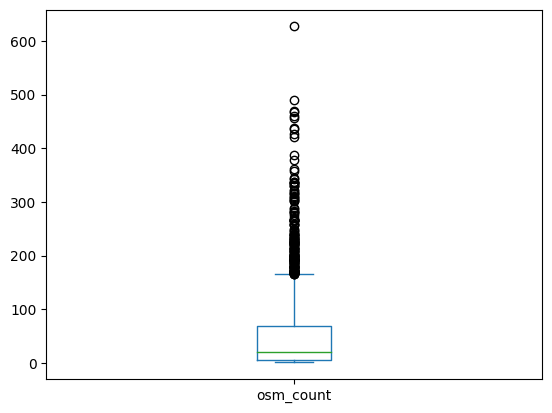

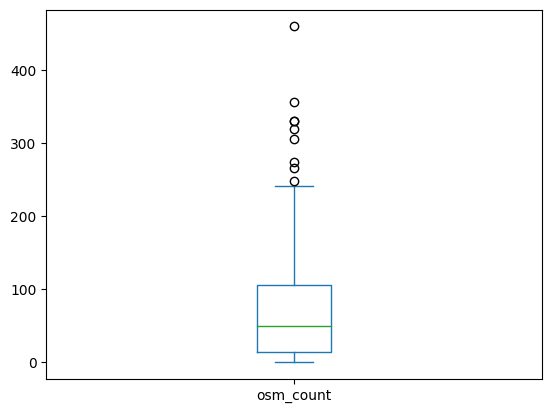

In [61]:
plt.figure()
df.osm_count.plot(kind="box")
plt.figure()
df_test.osm_count.plot(kind="box")


In [62]:
df_test.osm_count.fillna(df_test.osm_count.median(),inplace=True)

C:\Users\chemi\AppData\Local\Temp\ipykernel_14864\1860989338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.osm_count.fillna(df_test.osm_count.median(),inplace=True)


In [63]:
df_test.isnull().sum()

ndvi_mean                      0
ndbi_mean                      0
albedo_mean                    0
gaia_mean                      0
ntl_mean                       0
s1vh_mean                      0
s1vv_mean                      0
pop_sum                        0
poi_businessfacility           0
poi_restaurant                 0
poi_nightlife                  0
poi_shopping                   0
poi_hotel                      0
poi_cinema                     0
poi_sportscomplex              0
poi_sportscentre               0
poi_hospital                   0
poi_school                     0
poi_conveniencestr             0
poi_gurugram_v1_clothingstr    0
poi_sportinggoodsstr           0
poi_medicalservice             0
poi_residentialbuilding        0
poi_consumerelectronicsstr     0
lulc_Vegetation                0
lulc_Barren                    0
lulc_Builtup                   0
osm_count                      0
height_mean                    0
dtype: int64

#### DATA DESCRIPTION

In [64]:
df_test.describe().T

count           mean           std           min  \
ndvi_mean                    197.0       0.109824      0.046776      0.011684   
ndbi_mean                    197.0      -0.053247      0.016491     -0.106735   
albedo_mean                  197.0       0.244568      0.009938      0.215910   
gaia_mean                    197.0      20.138278      6.000665      2.202899   
ntl_mean                     197.0      32.399564      9.668186     18.628571   
s1vh_mean                    197.0     -12.086241      1.242741    -16.060518   
s1vv_mean                    197.0      -5.264807      1.494106     -8.812301   
pop_sum                      197.0     792.403649    292.624730     87.877848   
poi_businessfacility         197.0      13.304569     25.609282      0.000000   
poi_restaurant               197.0       3.507614      7.212956      0.000000   
poi_nightlife                197.0       0.152284      0.787114      0.000000   
poi_shopping                 197.0       0.350254      0.997017      0.000000   
poi_hotel                    197.0       0.675127      1.800238      0.000000   
poi_cinema                   197.0       0.045685      0.307963      0.000000   
poi_sportscomplex            197.0       0.020305      0.141399      0.000000   
poi_sportscentre             197.0       0.309645      0.776280      0.000000   
poi_hospital                 197.0       0.172589      0.721860      0.000000   
poi_school                   197.0       0.710660      1.385986      0.000000   
poi_conveniencestr           197.0       0.416244      1.194947      0.000000   
poi_gurugram_v1_clothingstr  197.0       3.517766     16.427514      0.000000   
poi_sportinggoodsstr         197.0       0.065990      0.268614      0.000000   
poi_medicalservice           197.0       1.776650      3.003546      0.000000   
poi_residentialbuilding      197.0       1.710660      2.774251      0.000000   
poi_consumerelectronicsstr   197.0       2.304569      4.731422      0.000000   
lulc_Vegetation              197.0    3342.131980  12504.803221      0.000000   
lulc_Barren                  197.0     286.294416   1649.138605      0.000000   
lulc_Builtup                 197.0  100298.984772  12558.251982  12400.000000   
osm_count                    197.0      74.751269     80.446357      0.000000   
height_mean                  197.0       4.463041      6.025553      3.000000   

                                       25%            50%            75%  \
ndvi_mean                         0.073301       0.108481       0.137233   
ndbi_mean                        -0.064328      -0.053621      -0.044167   
albedo_mean                       0.237501       0.243337       0.251390   
gaia_mean                        17.000000      20.904412      24.729927   
ntl_mean                         24.577143      32.041860      35.976094   
s1vh_mean                       -12.825080     -12.259201     -11.431497   
s1vv_mean                        -6.111005      -5.526170      -4.630695   
pop_sum                         600.498628     790.900632     981.302636   
poi_businessfacility              0.000000       3.000000      12.000000   
poi_restaurant                    0.000000       1.000000       3.000000   
poi_nightlife                     0.000000       0.000000       0.000000   
poi_shopping                      0.000000       0.000000       0.000000   
poi_hotel                         0.000000       0.000000       1.000000   
poi_cinema                        0.000000       0.000000       0.000000   
poi_sportscomplex                 0.000000       0.000000       0.000000   
poi_sportscentre                  0.000000       0.000000       0.000000   
poi_hospital                      0.000000       0.000000       0.000000   
poi_school                        0.000000       0.000000       1.000000   
poi_conveniencestr                0.000000       0.000000       0.000000   
poi_gurugram_v1_clothingstr       0.000000       0.000000       1.000000   
po

#### Here we see the which columns are normaly distributed

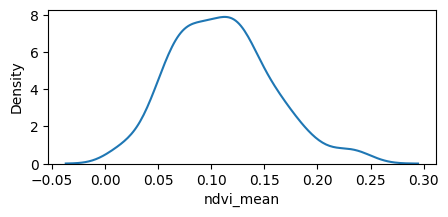

satatics:- 0.983 
 p:- 0.017
Above plot is NOT Normaly Distributer 
 



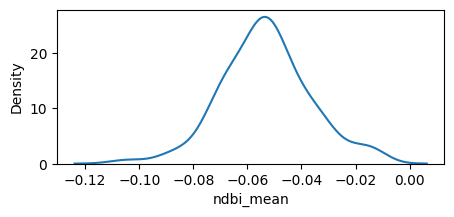

satatics:- 0.987 
 p:- 0.070
Above plot is Normaly Distributer 
 



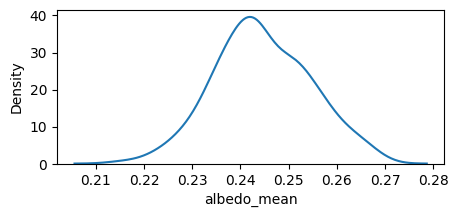

satatics:- 0.994 
 p:- 0.662
Above plot is Normaly Distributer 
 



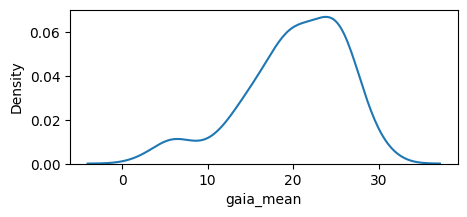

satatics:- 0.948 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



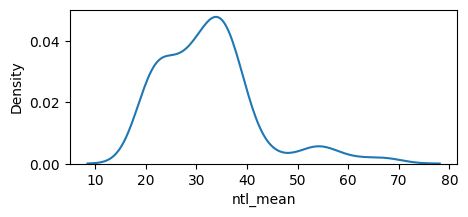

satatics:- 0.895 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



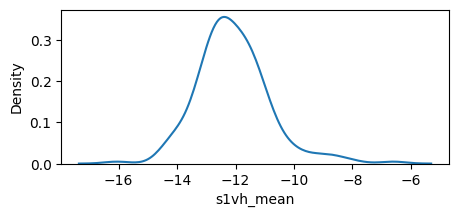

satatics:- 0.956 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



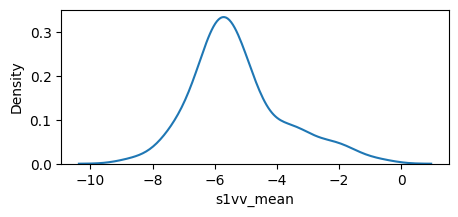

satatics:- 0.952 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



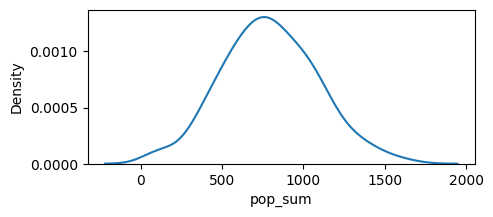

satatics:- 0.996 
 p:- 0.876
Above plot is Normaly Distributer 
 



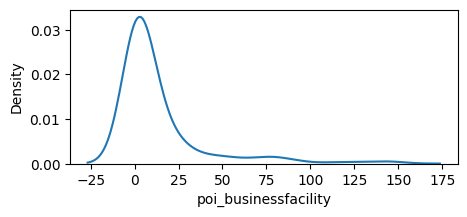

satatics:- 0.564 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



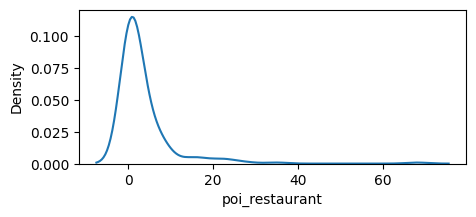

satatics:- 0.500 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



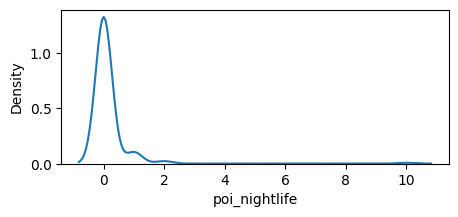

satatics:- 0.180 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



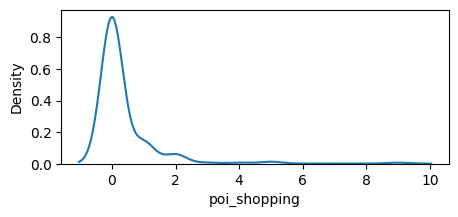

satatics:- 0.394 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



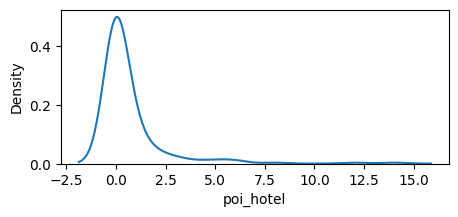

satatics:- 0.427 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



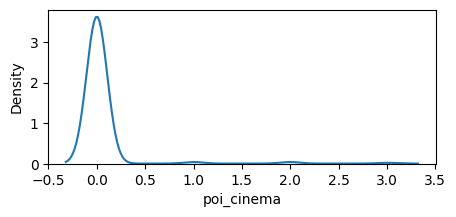

satatics:- 0.135 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



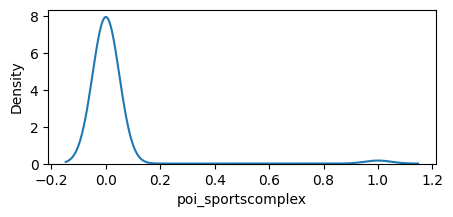

satatics:- 0.122 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



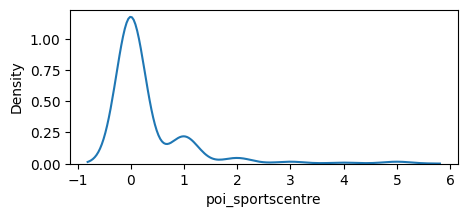

satatics:- 0.452 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



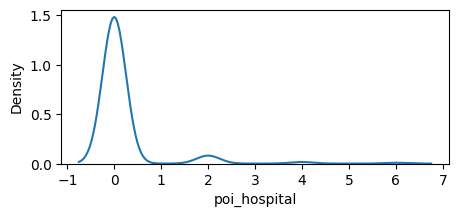

satatics:- 0.255 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



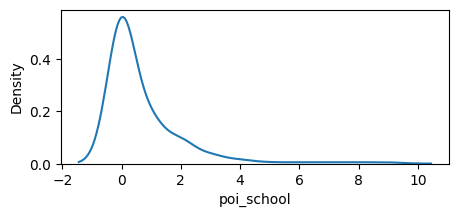

satatics:- 0.570 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



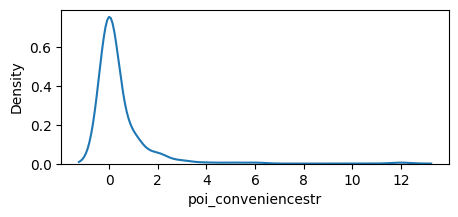

satatics:- 0.381 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



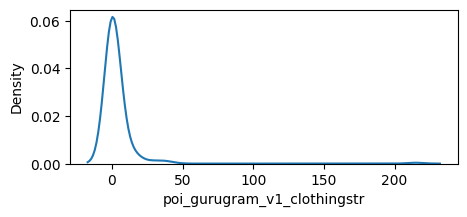

satatics:- 0.192 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



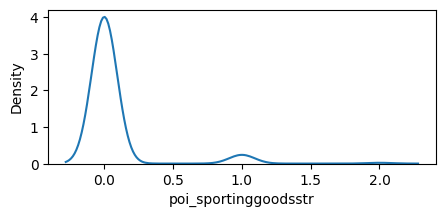

satatics:- 0.256 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



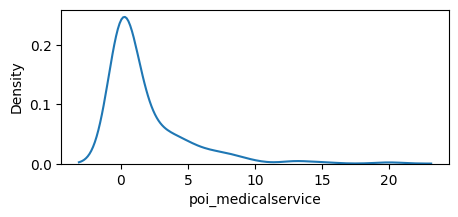

satatics:- 0.648 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



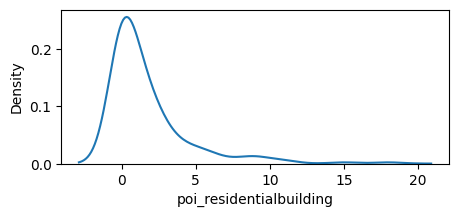

satatics:- 0.655 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



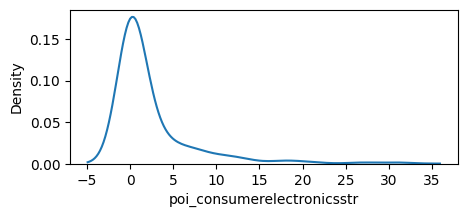

satatics:- 0.556 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



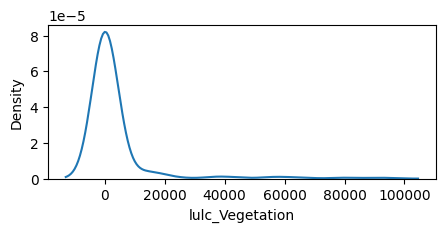

satatics:- 0.298 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



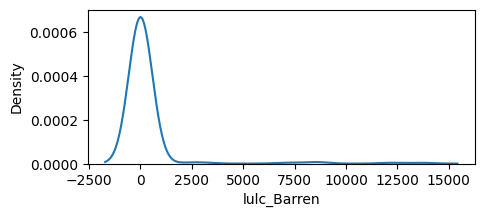

satatics:- 0.168 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



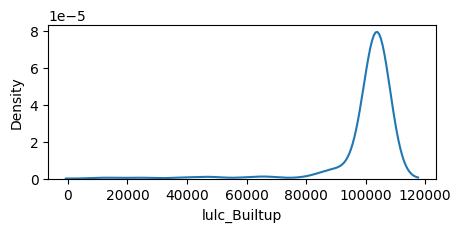

satatics:- 0.345 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



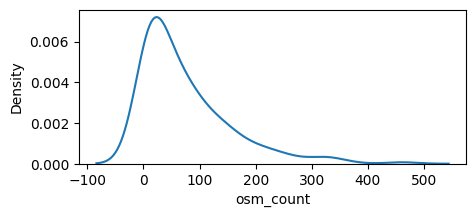

satatics:- 0.812 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



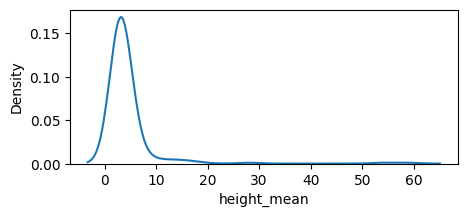

satatics:- 0.250 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



In [65]:
from scipy.stats import shapiro
for i in df_test.columns:
    stat,p = shapiro(df_test[i])
    plt.figure(figsize=(5,2))
    sns.kdeplot(data=df_test[i])
    plt.show()
    print("satatics:- {0:.3f}".format(stat),"\n","p:- {0:.3f}".format(p))
    if p>0.05:
        print("Above plot is Normaly Distributer","\n","\n")
    else:
        print("Above plot is NOT Normaly Distributer","\n","\n")
    

### Line charts of to show the similarity in pattern with tha data target variable 

C:\Users\chemi\AppData\Local\Temp\ipykernel_14864\1118547358.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots(figsize=(15,4))


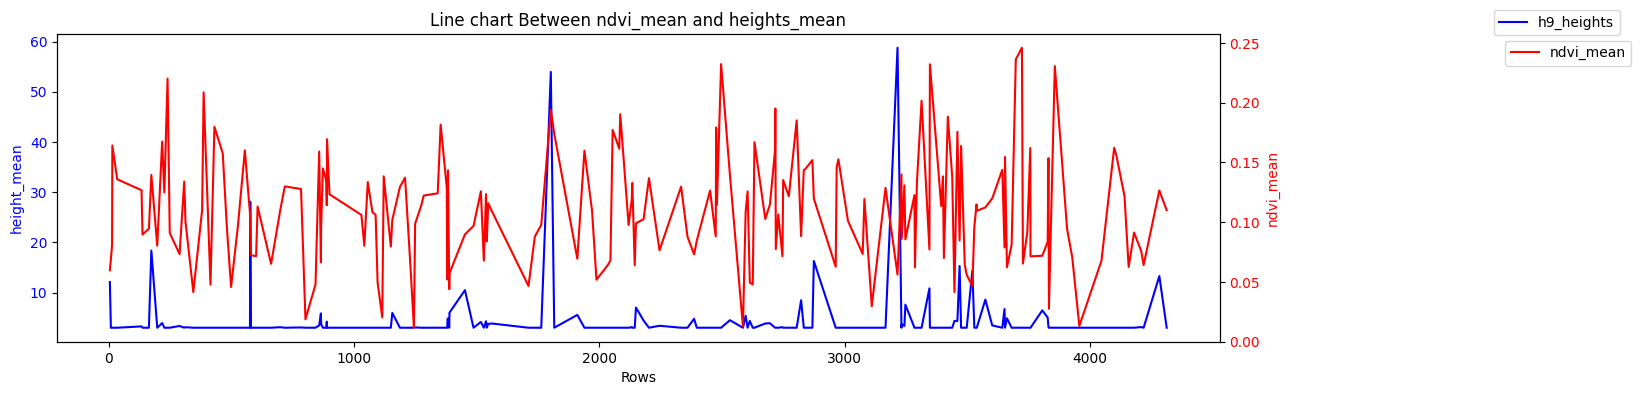

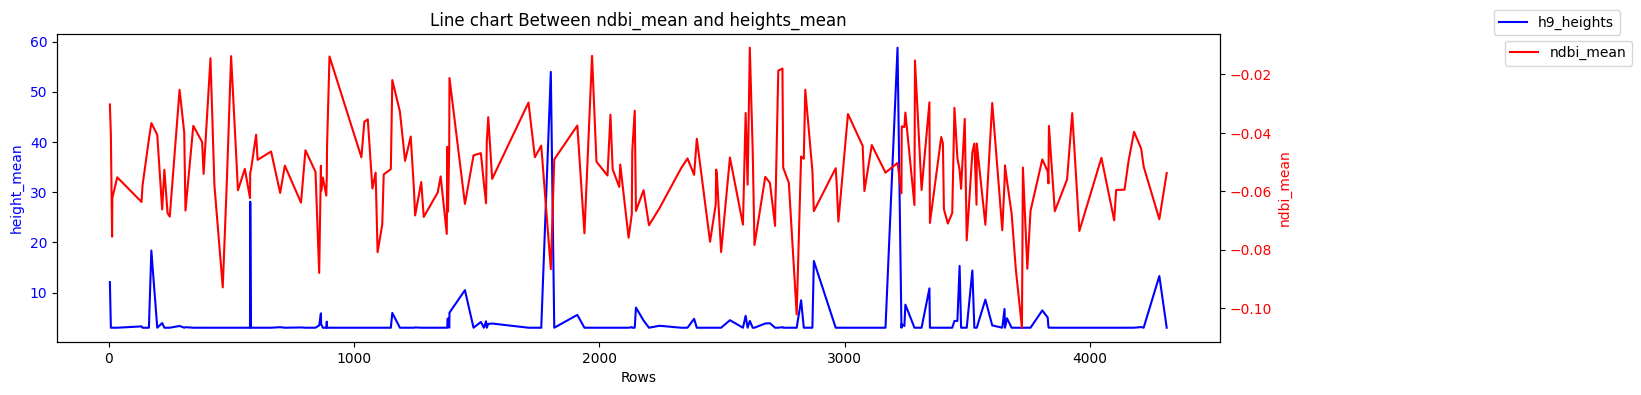

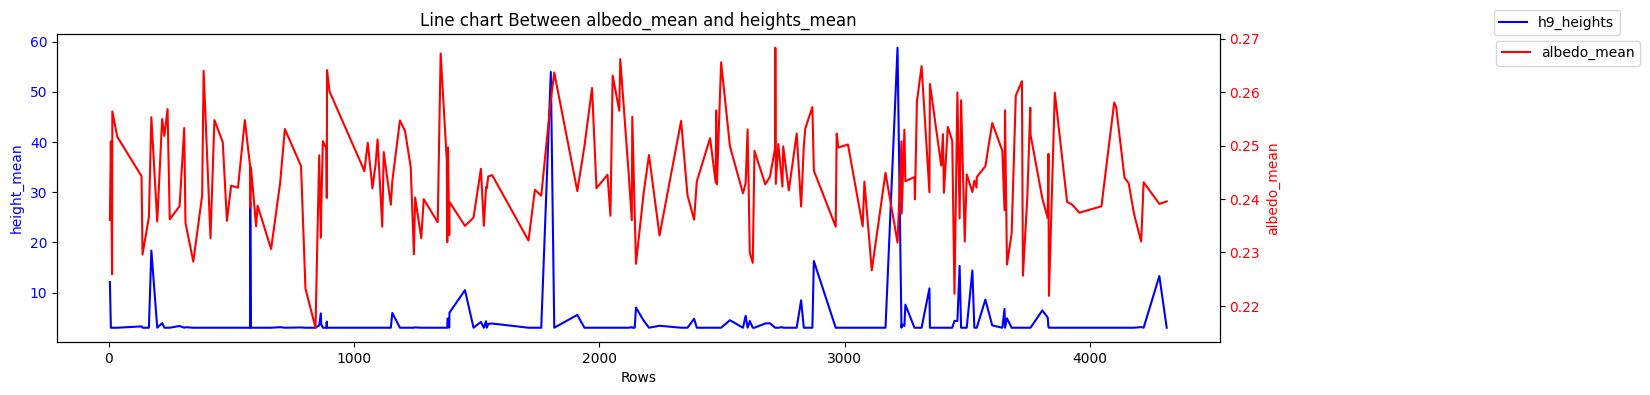

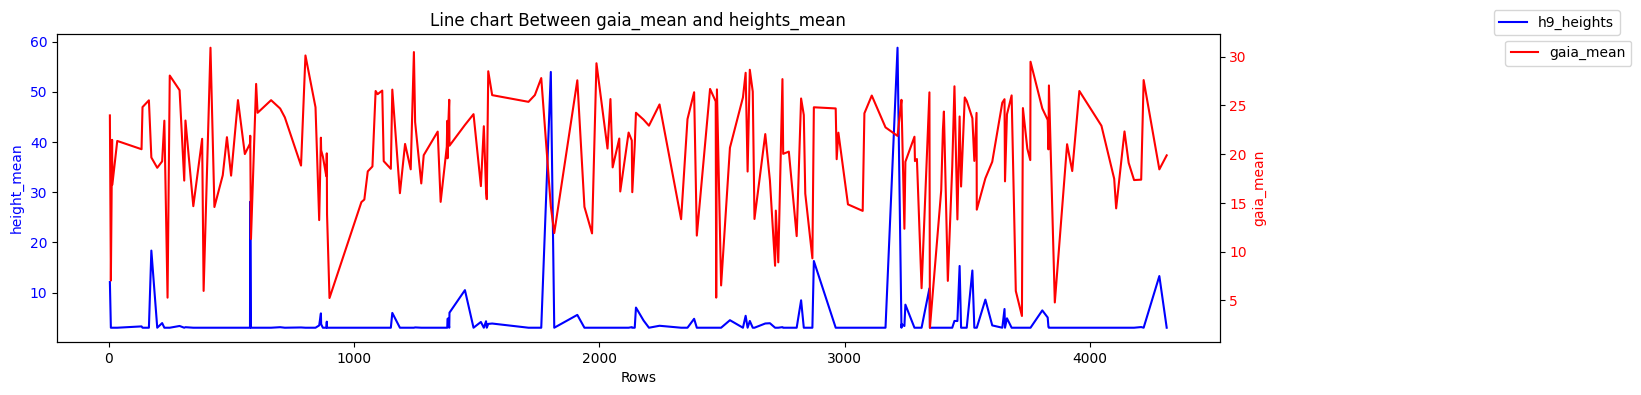

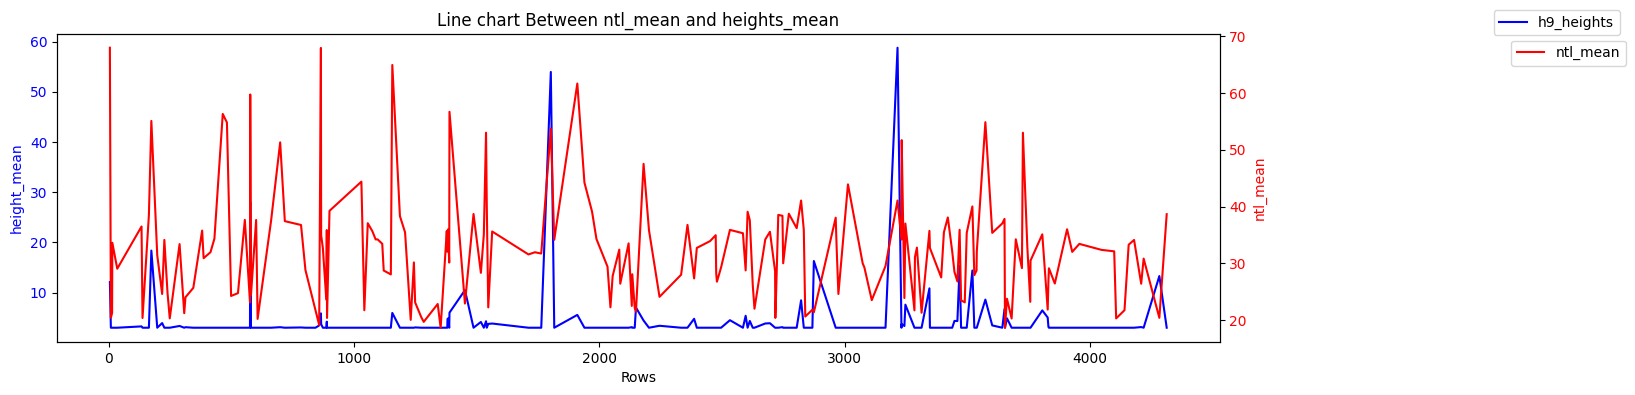

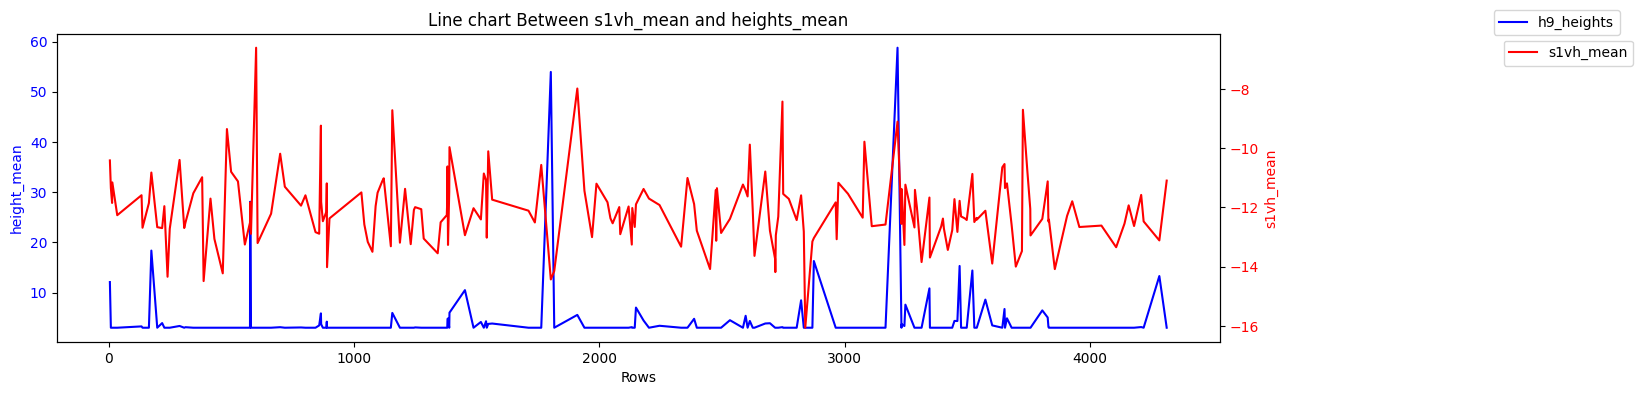

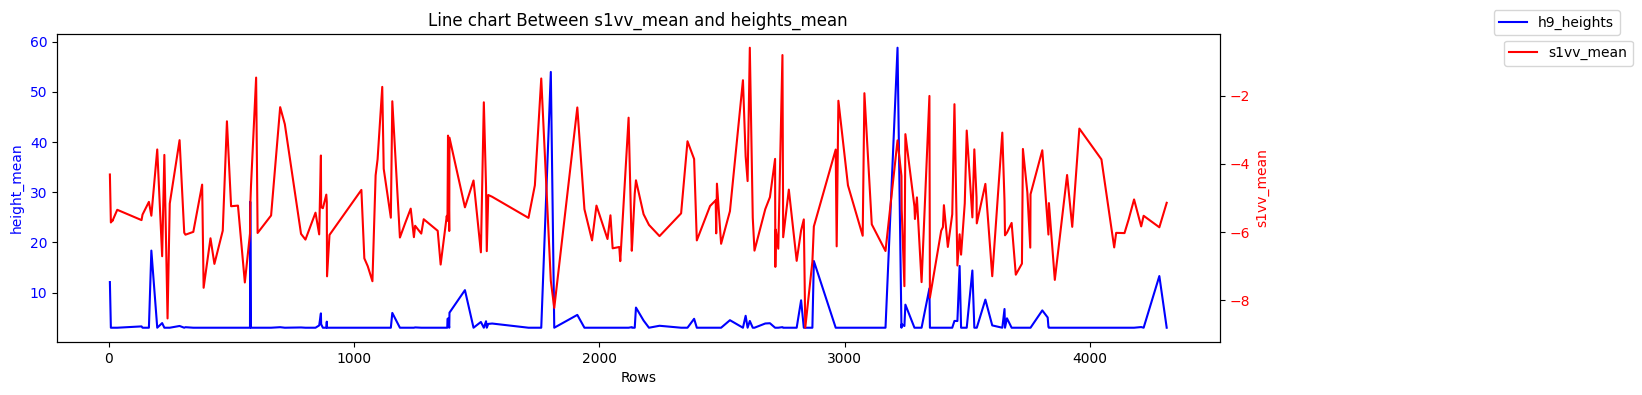

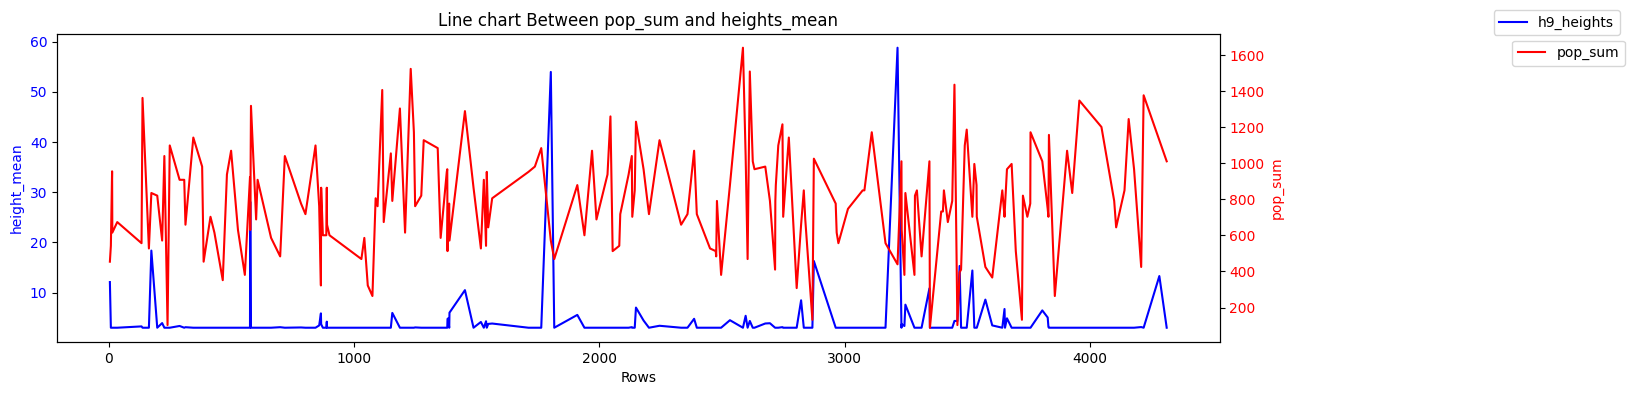

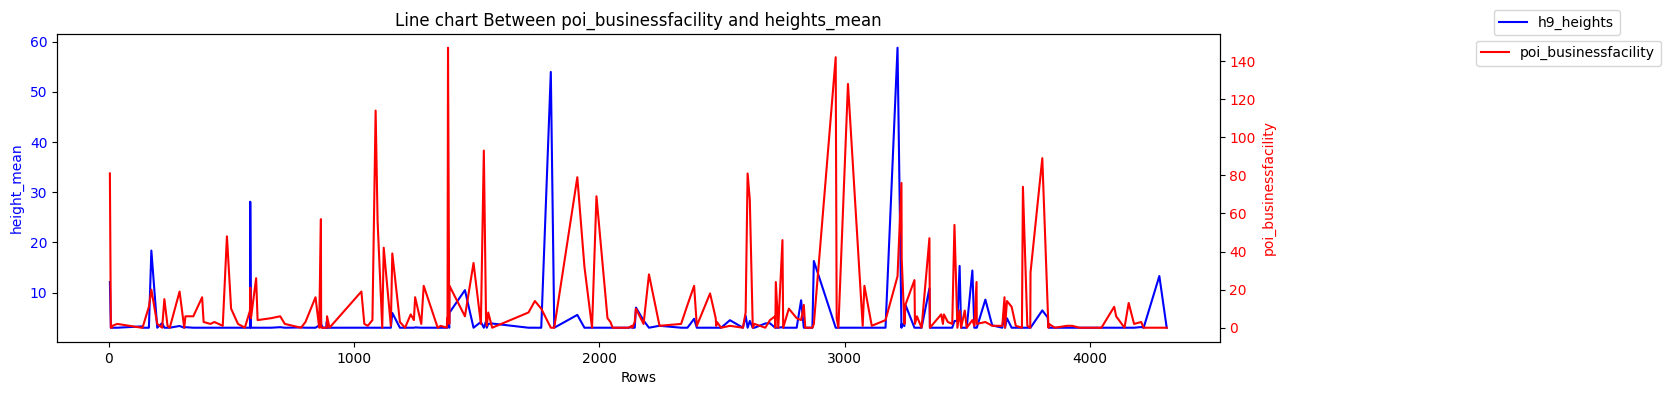

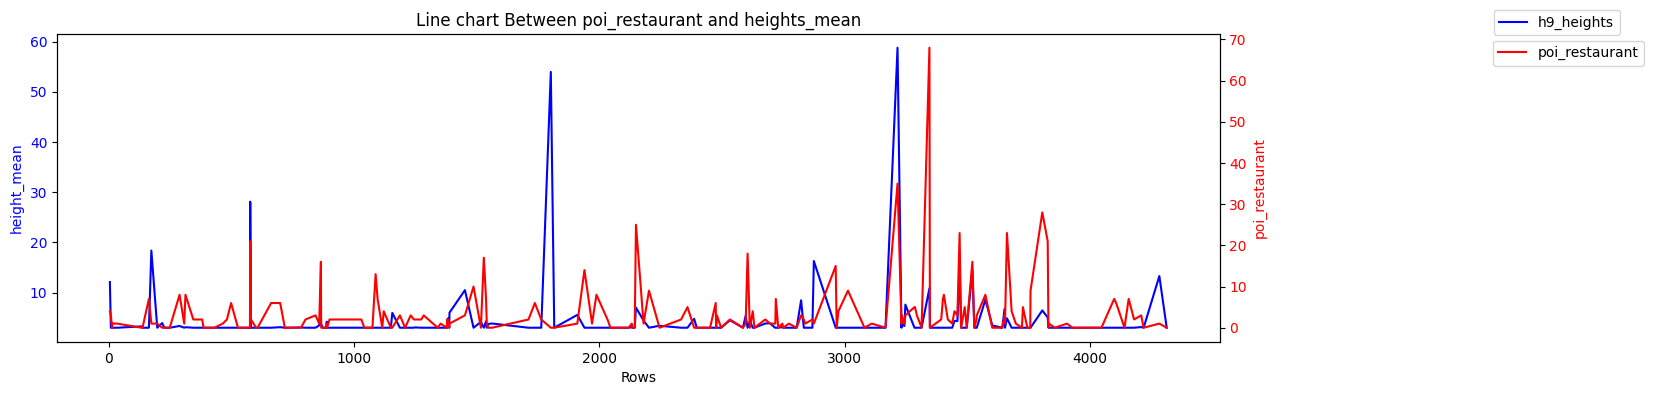

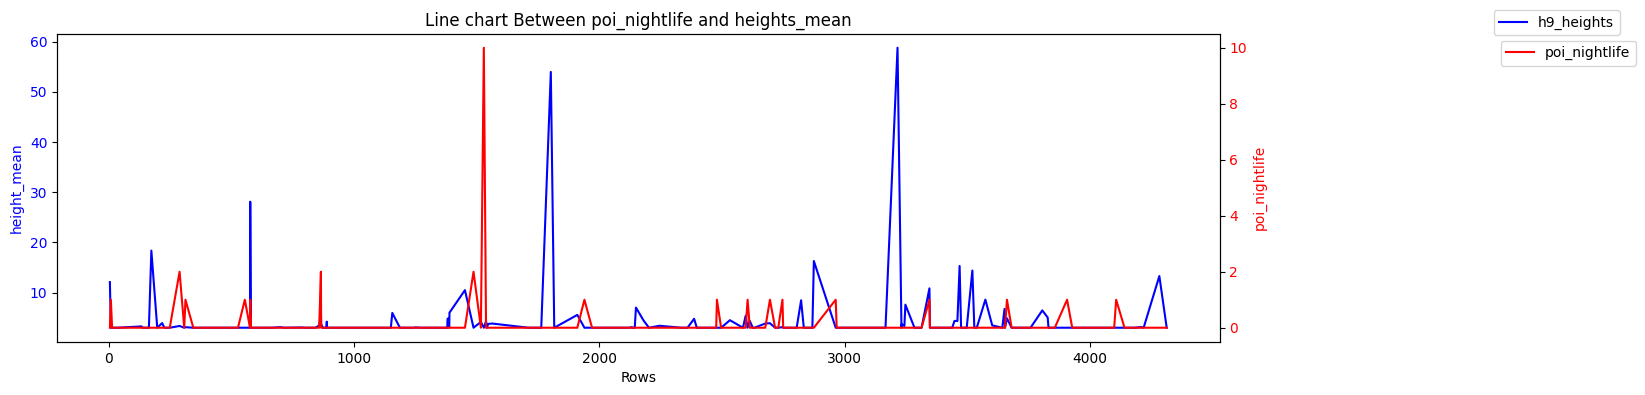

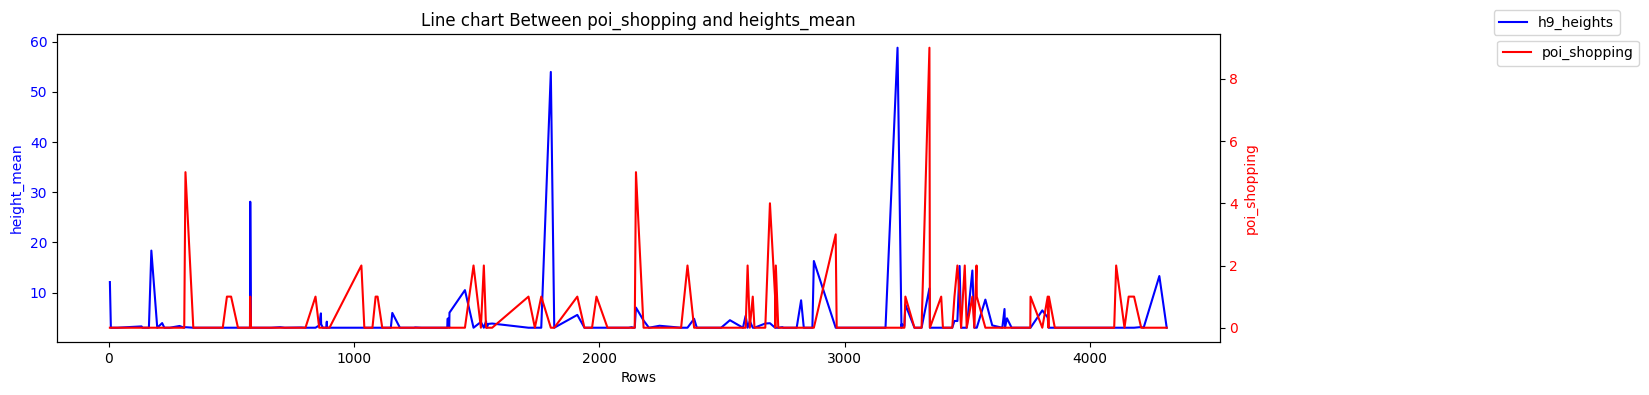

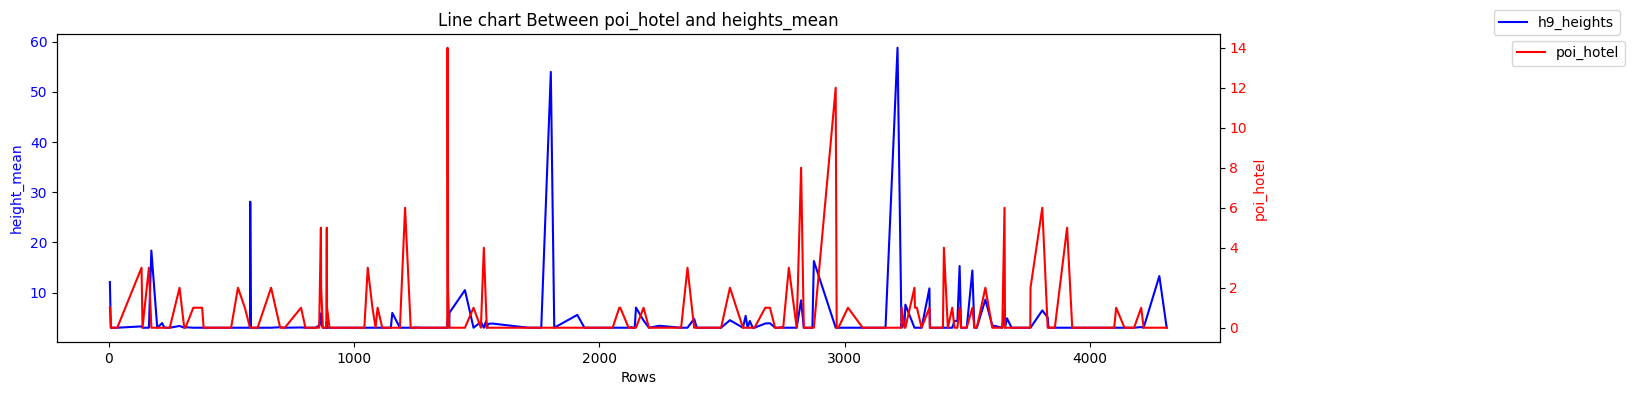

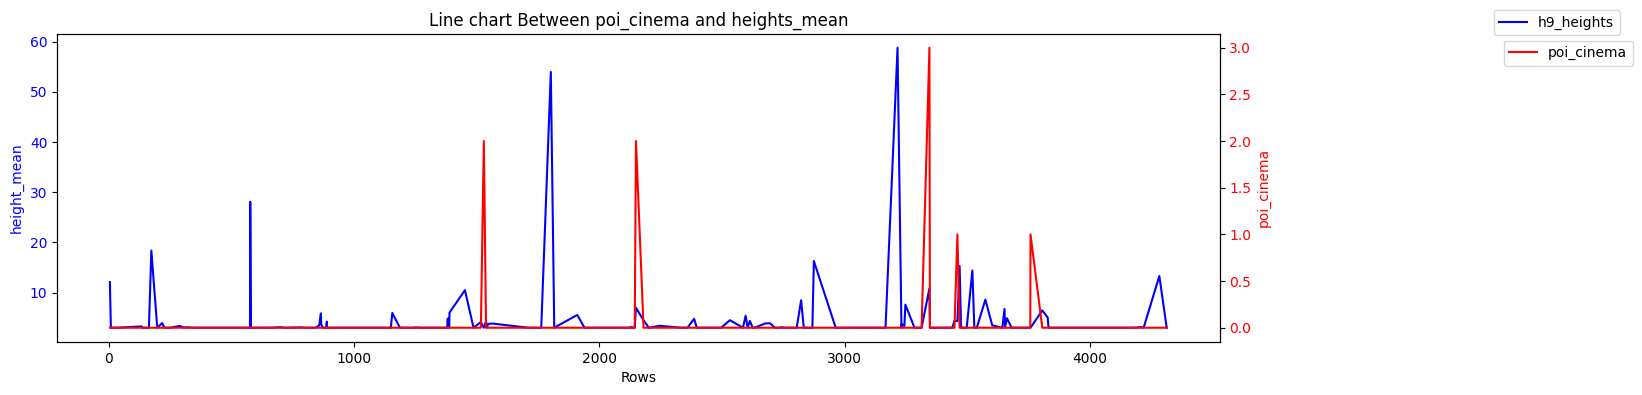

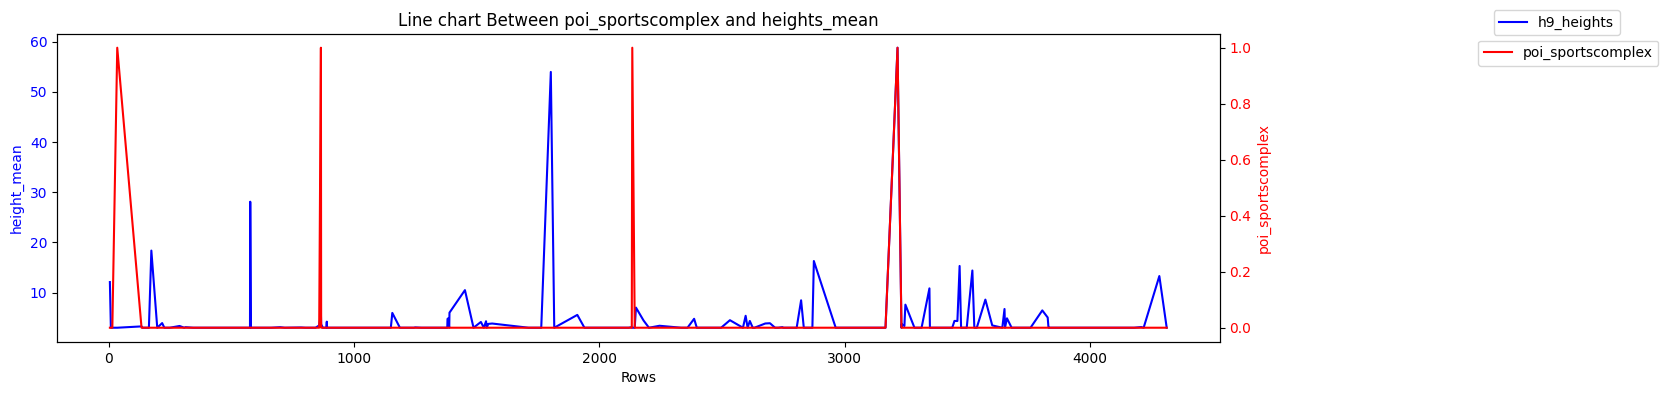

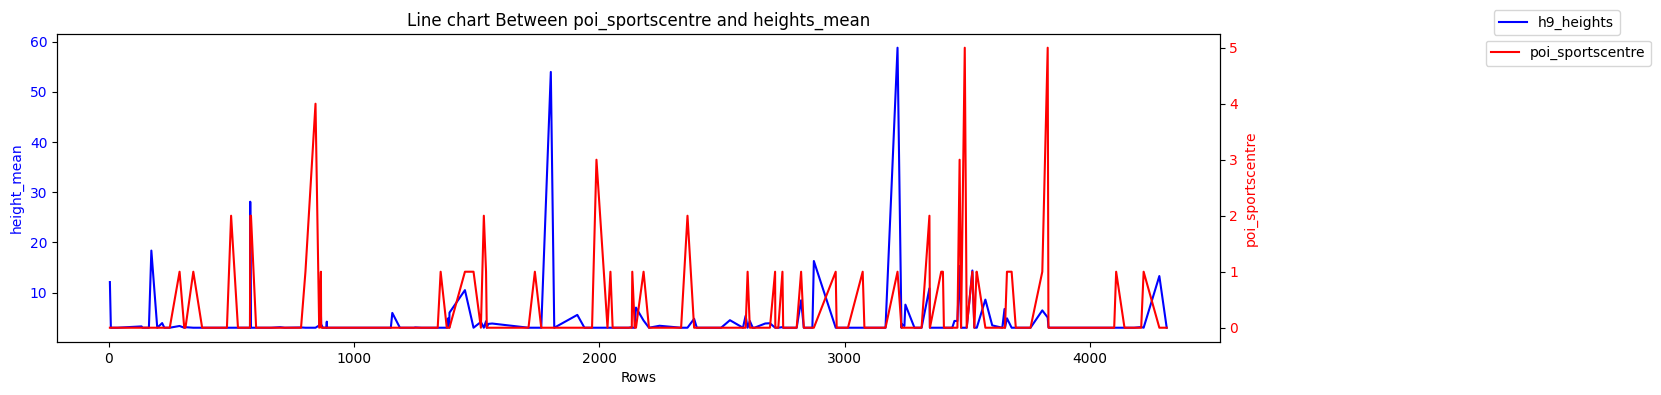

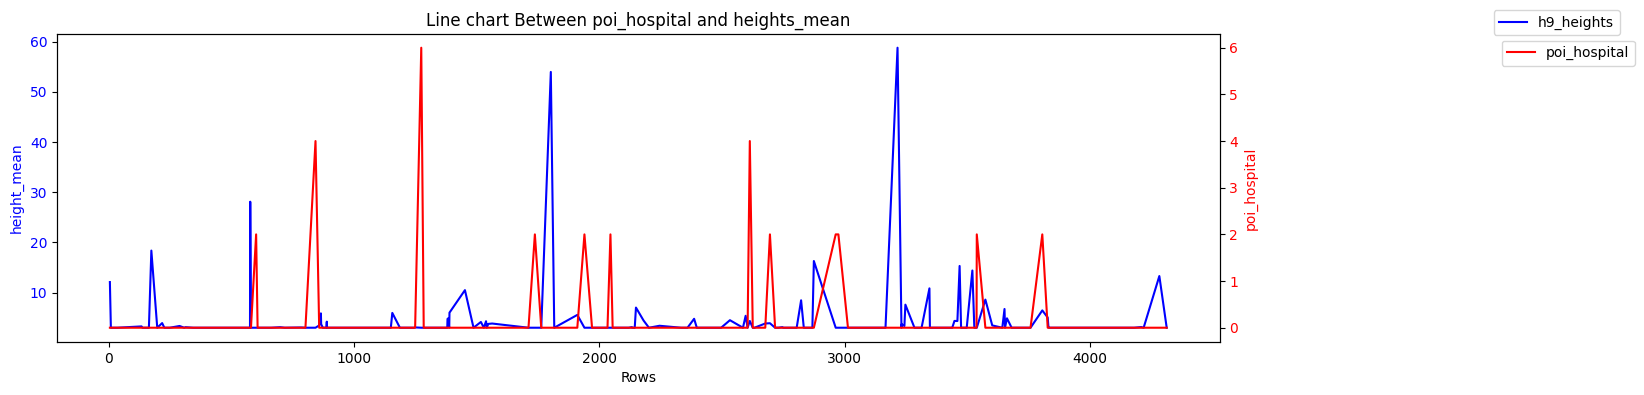

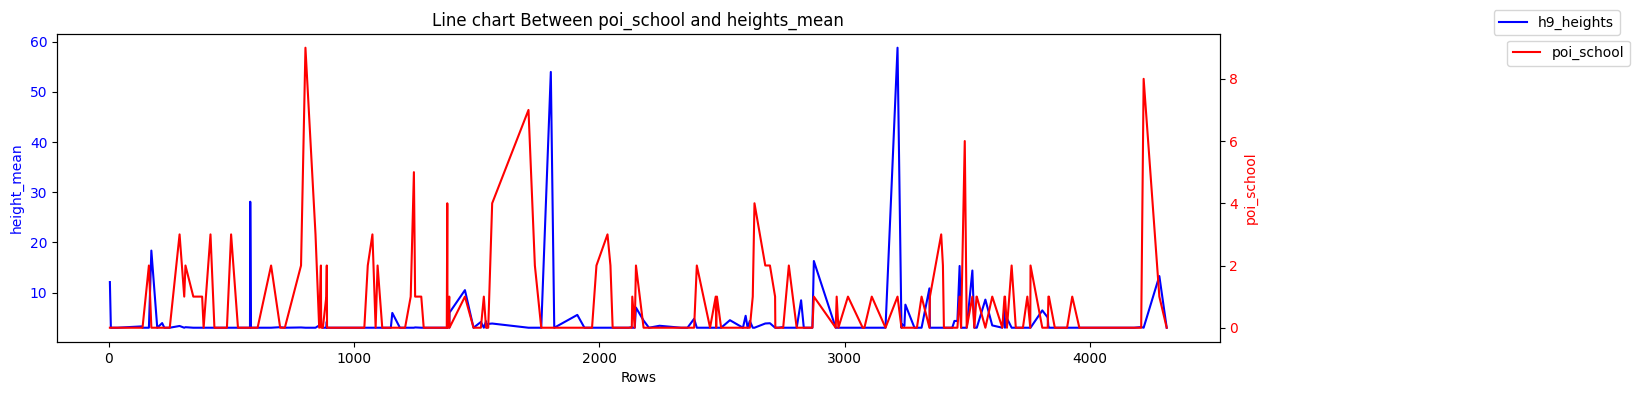

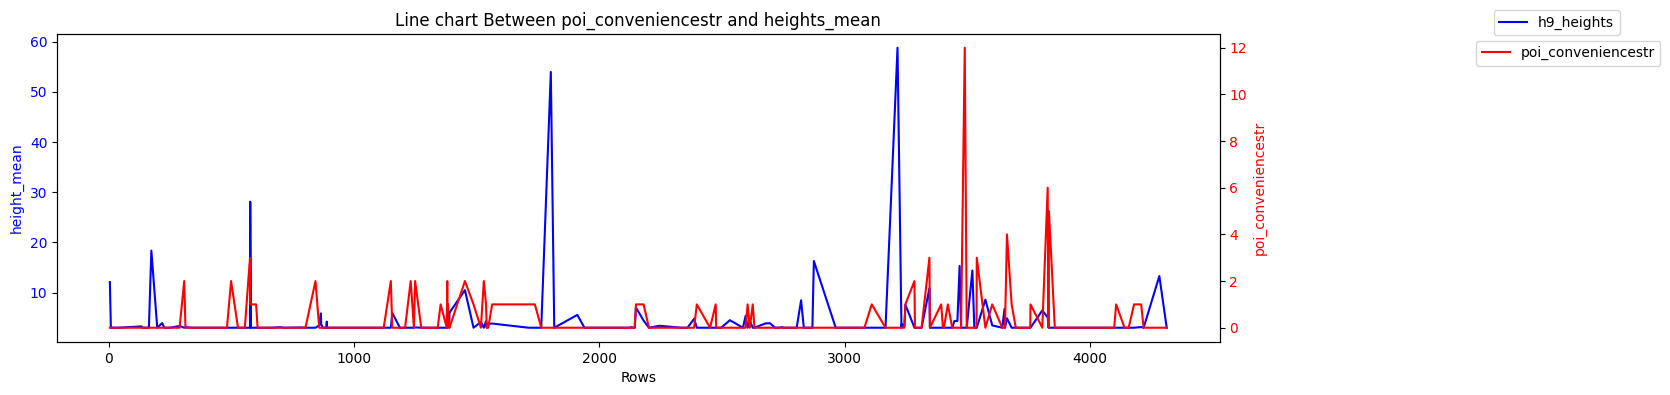

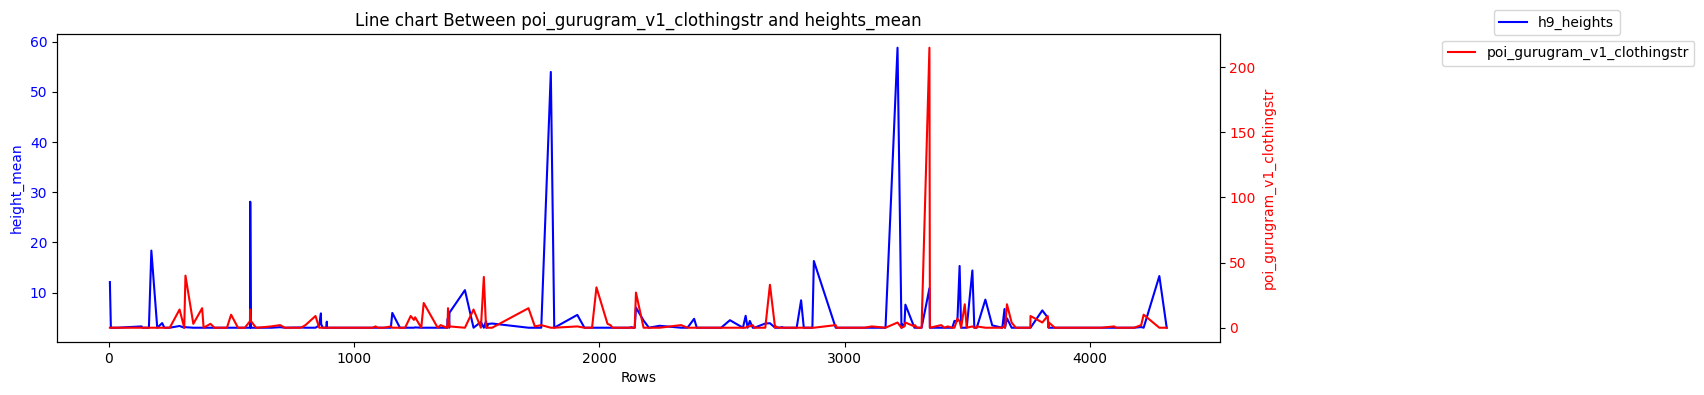

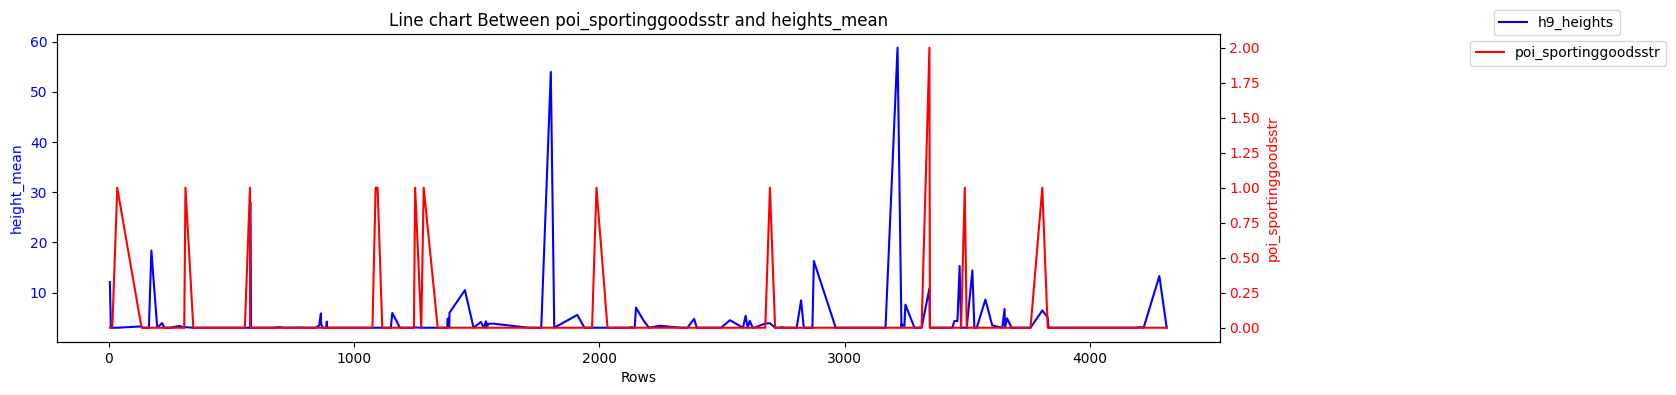

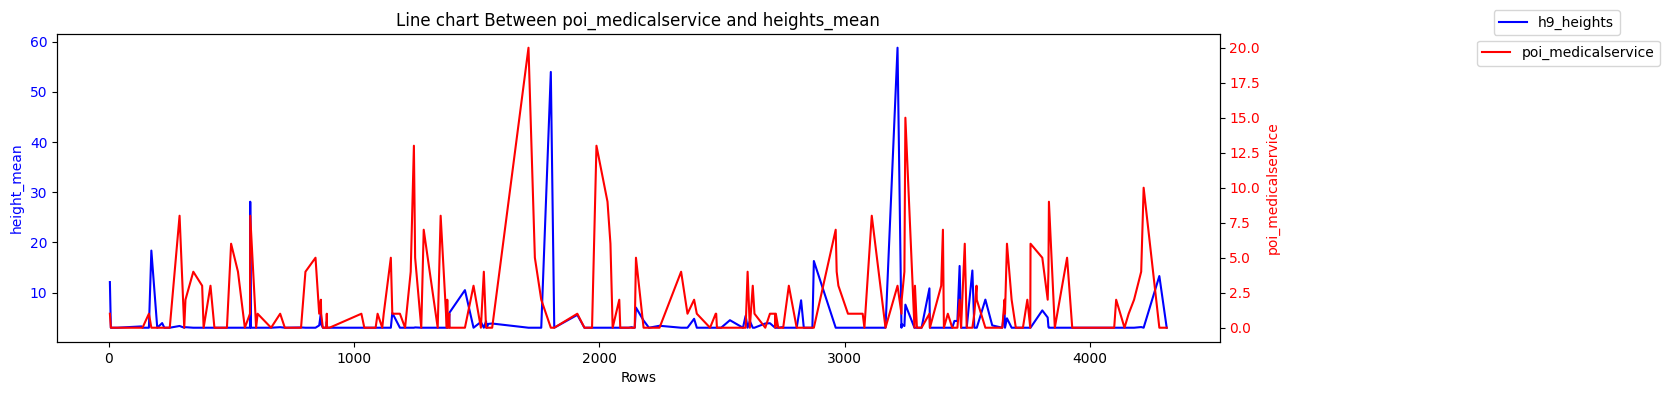

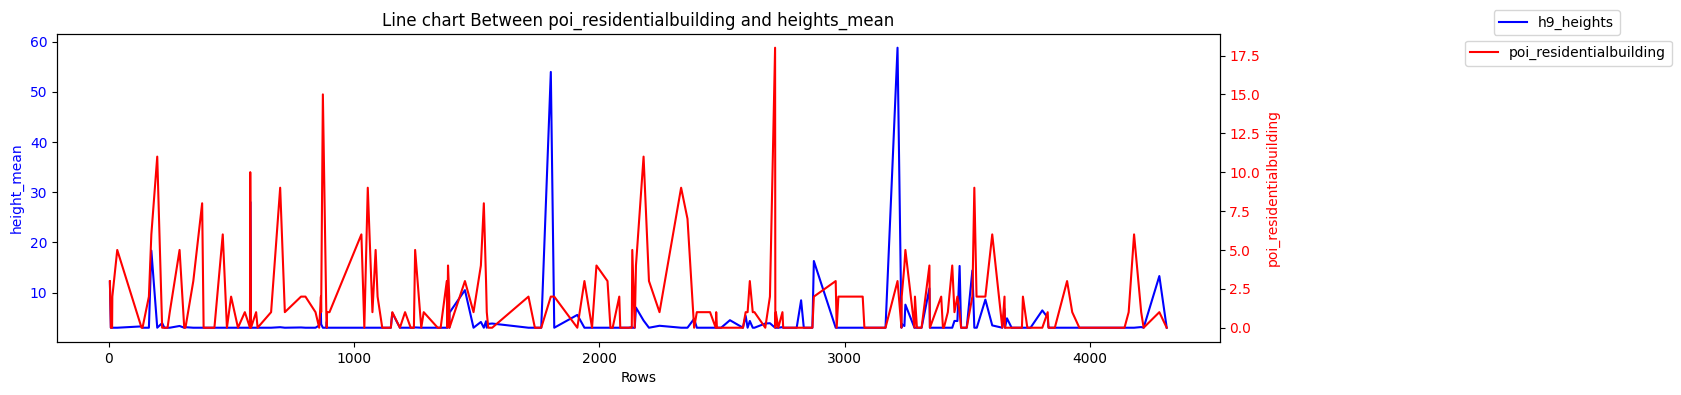

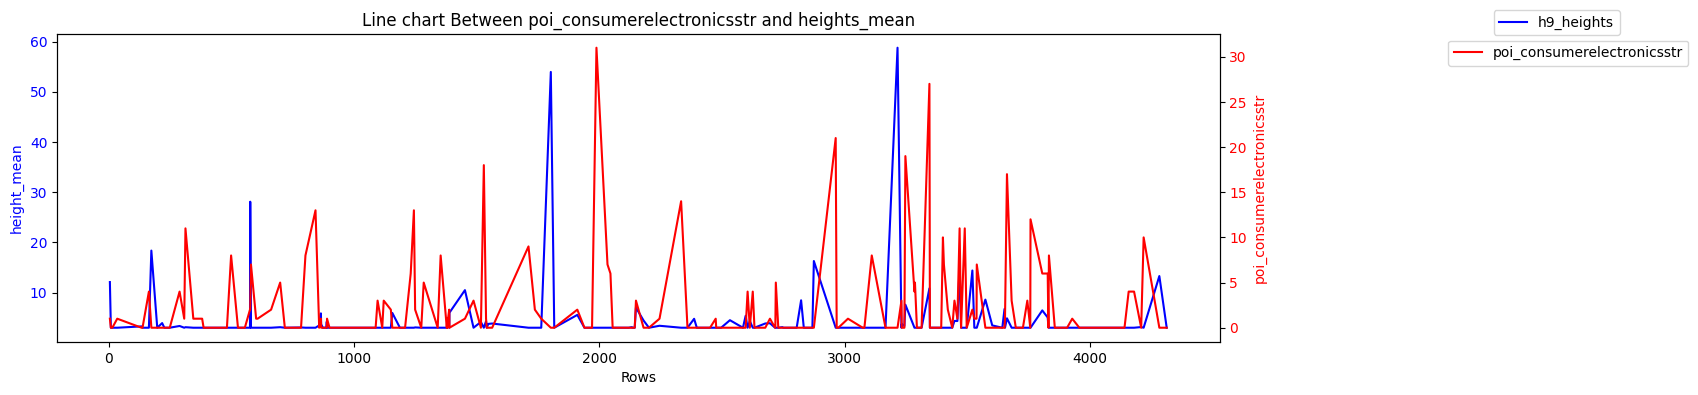

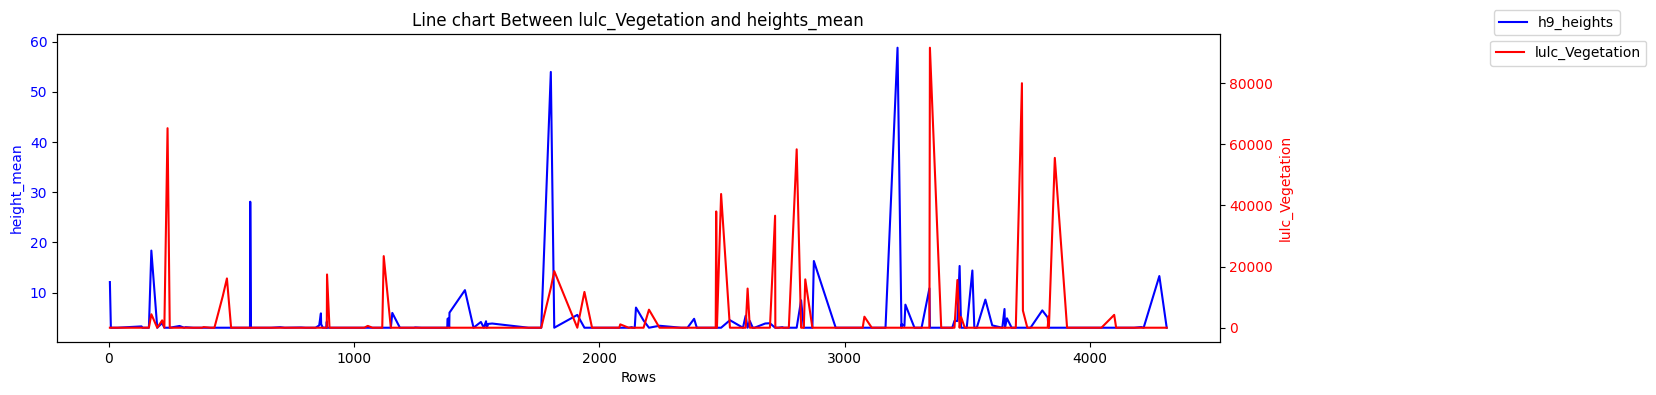

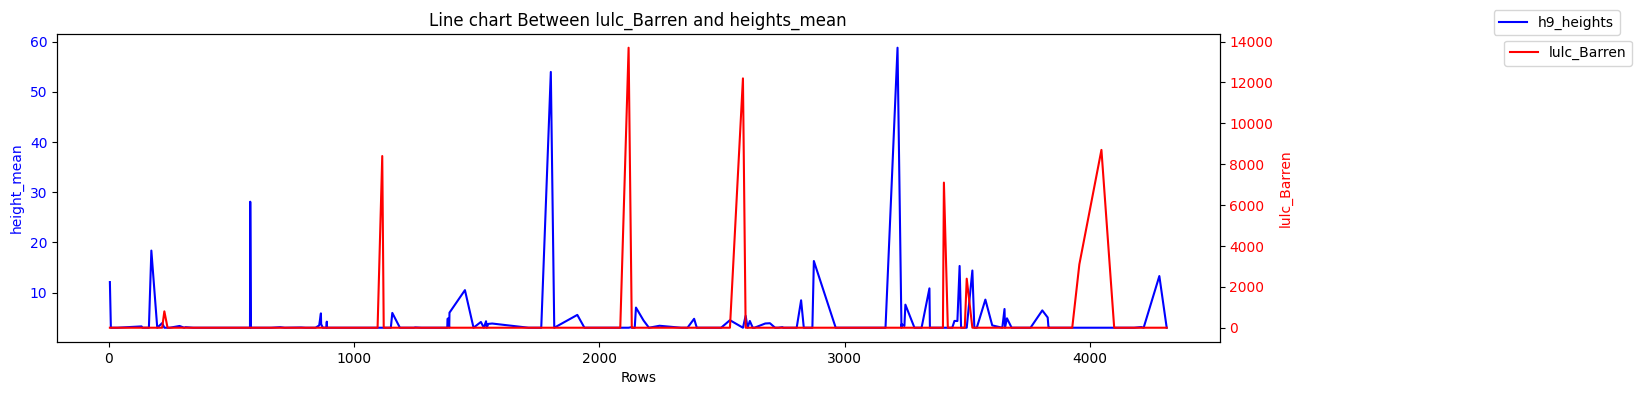

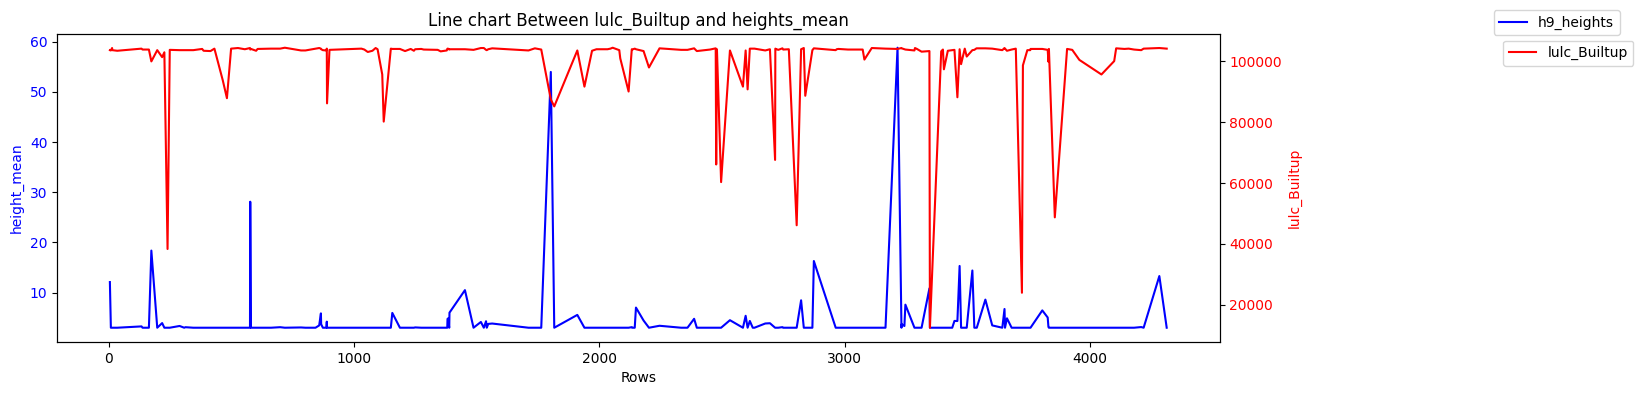

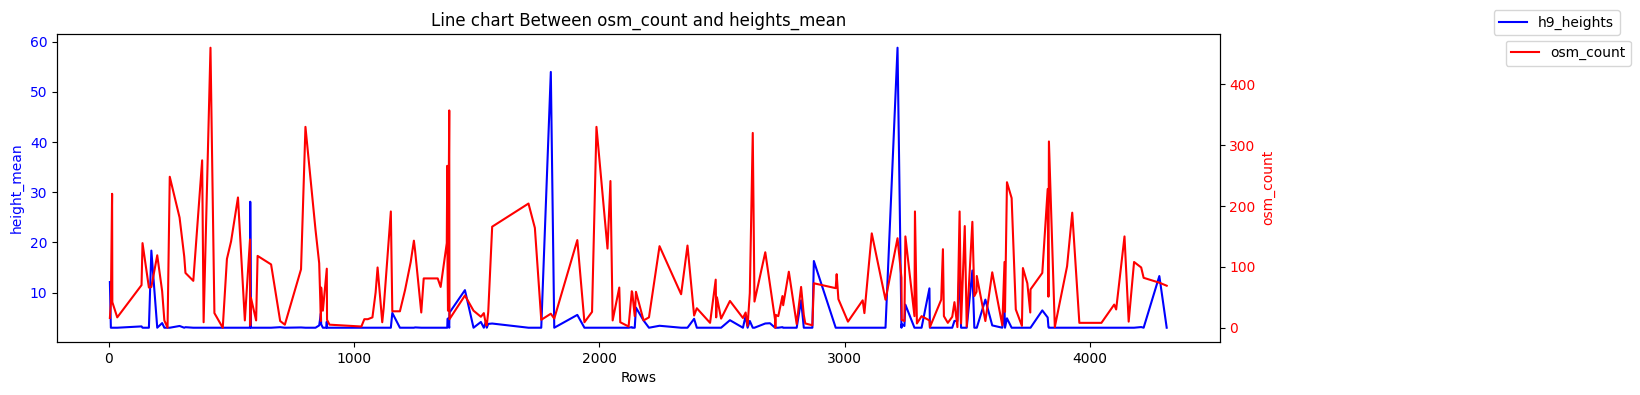

In [66]:
for i in df_test.columns[:-1]:
    fig, ax1 = plt.subplots(figsize=(15,4))
    ax1.plot(df_test["height_mean"], color='blue',label="h9_heights")
    ax1.set_ylabel("height_mean", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    plt.legend(bbox_to_anchor=(1.29, 1.1), loc='upper center')
   

    ax2 = ax1.twinx()
    ax2.plot(df_test[i] , color='red',label=i)
    #ax2.set_ylim(0, 1)  # set the range for the second axis
    ax2.set_ylabel(i, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    plt.legend(bbox_to_anchor=(1.3, 1.0), loc='upper center')
    
   
    
    ax1.set_xlabel('Rows')
    ax1.set_title(f'Line chart Between {i} and heights_mean')
    


#### Here is the boxplot which shows  outlier present in each column but s1_vh_mean and h8_heights_mean have more outlier

C:\Users\chemi\AppData\Local\Temp\ipykernel_14864\3756662529.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,2))


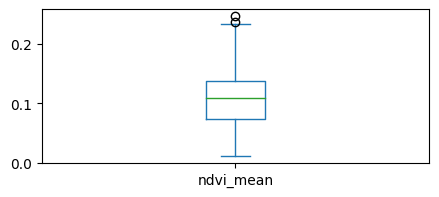

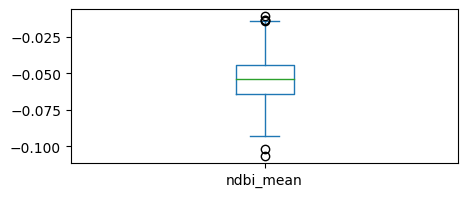

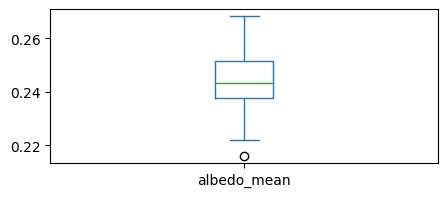

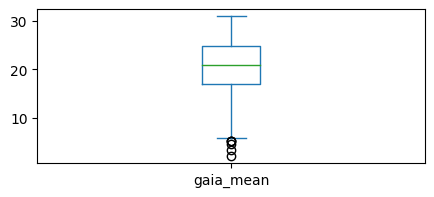

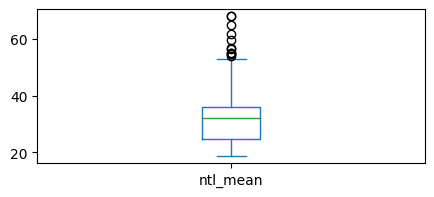

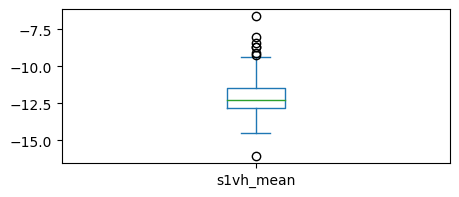

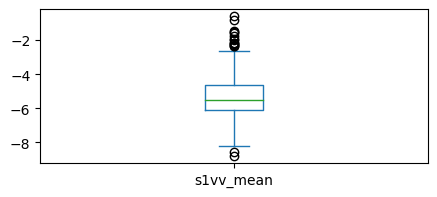

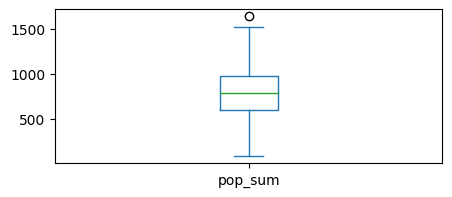

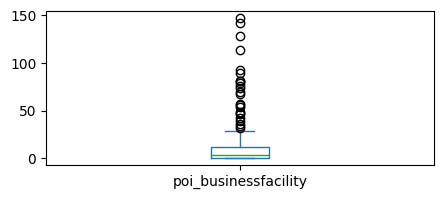

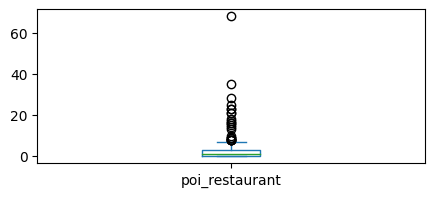

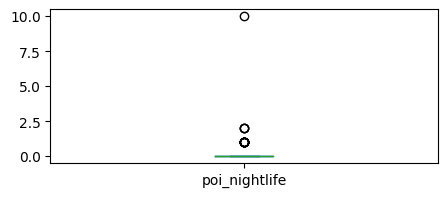

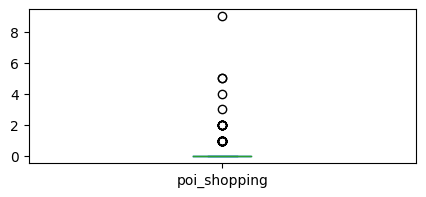

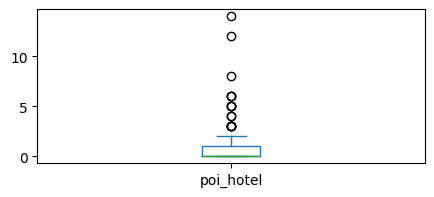

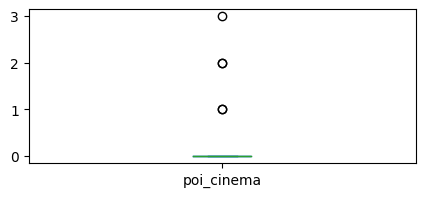

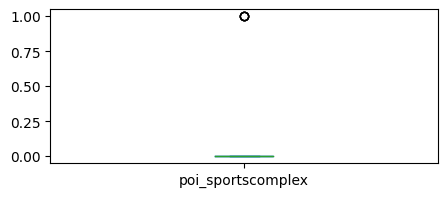

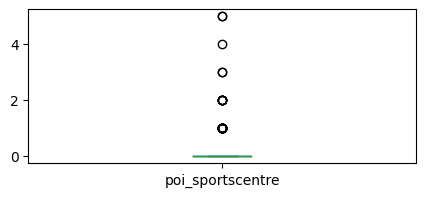

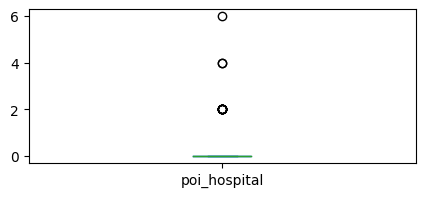

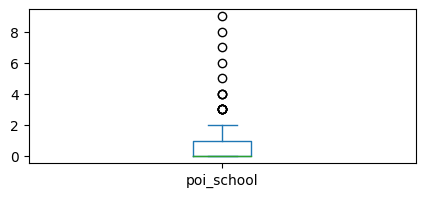

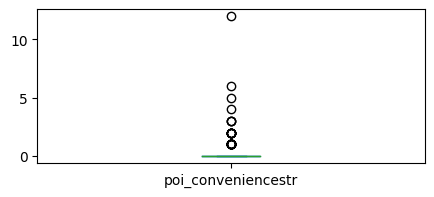

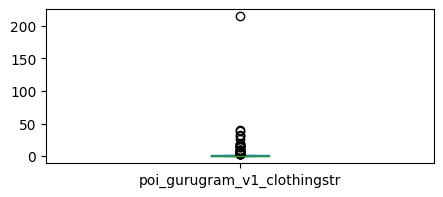

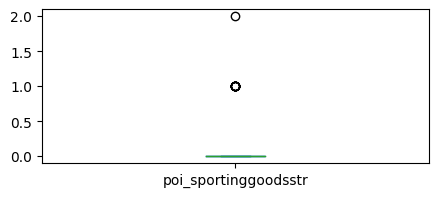

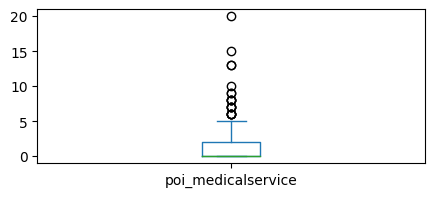

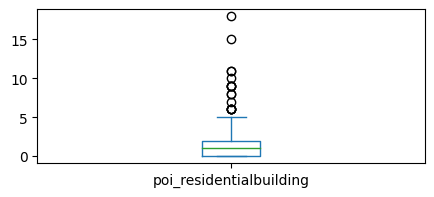

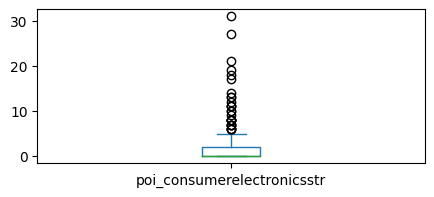

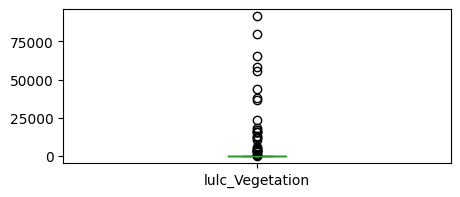

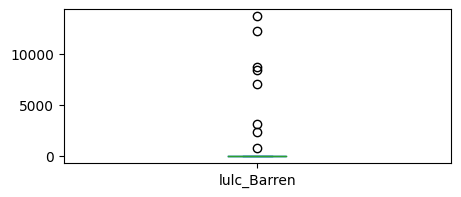

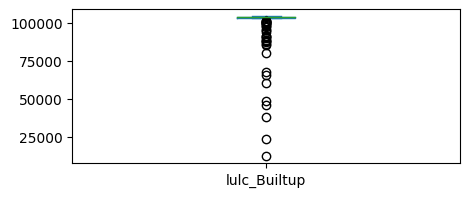

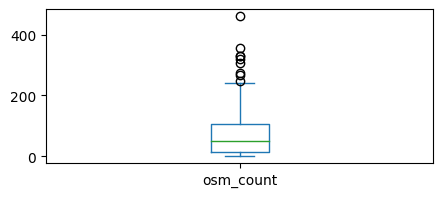

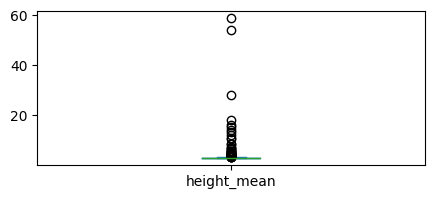

In [67]:
for i in df_test.columns:
    plt.figure(figsize=(5,2))
    df_test[i].plot(kind="box")
    #there is some outlier in  s1_vh_mean and h8_heights_mean

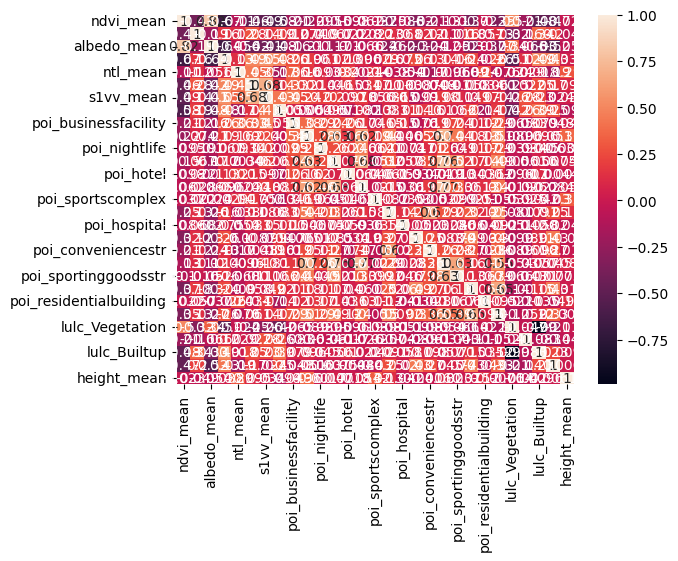

In [68]:
plt.figure(figsize=(10,30))
sns.heatmap(df_test.corr(),annot=True)
plt.show()
# There is highest positive correlation btw albedo_mean & ndvi_mean 
# There is highest negative correlation btw gaib_mean and h8_heights_mean

### Scatter plot shows the distribution of column with respect to height

C:\Users\chemi\AppData\Local\Temp\ipykernel_14864\3627519083.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


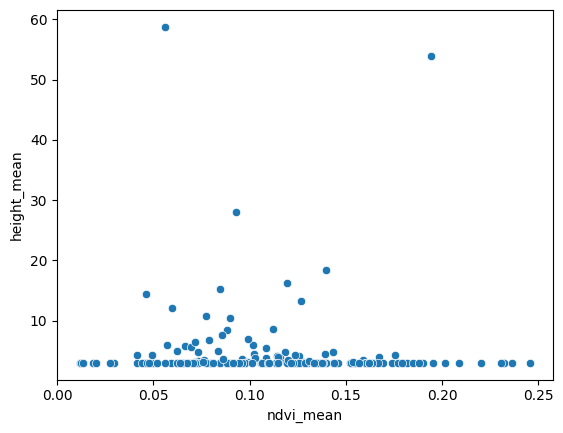

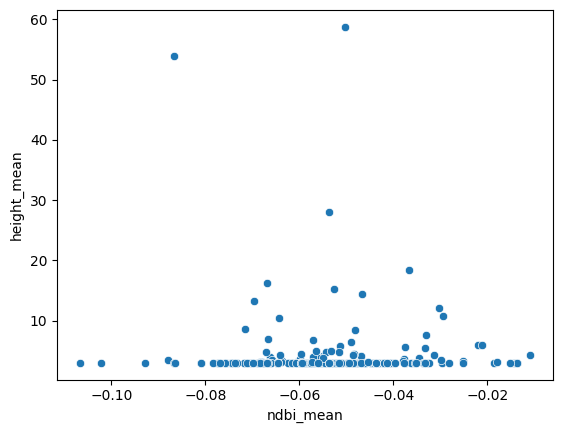

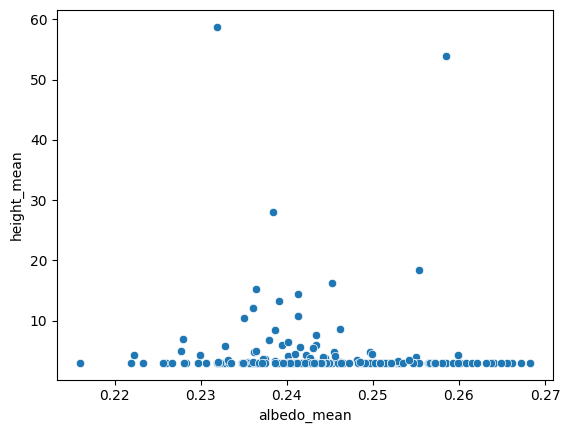

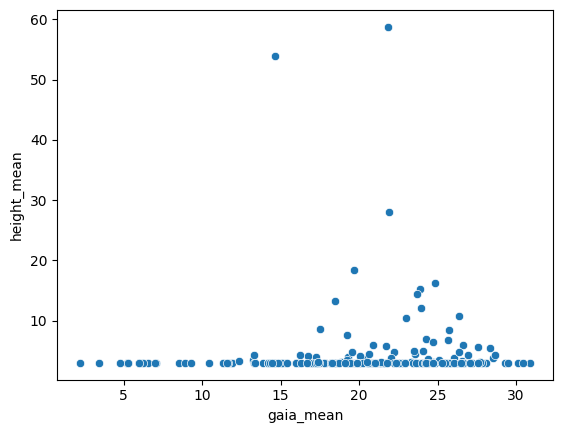

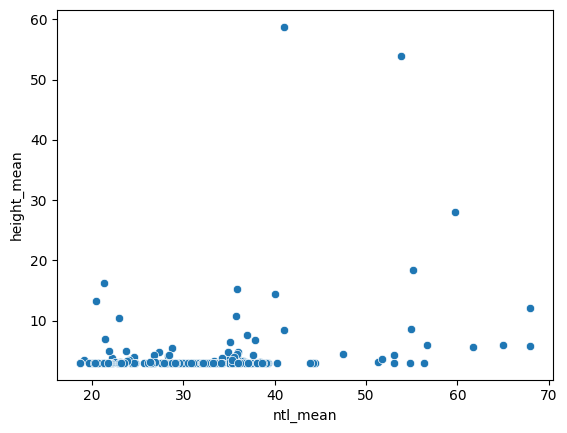

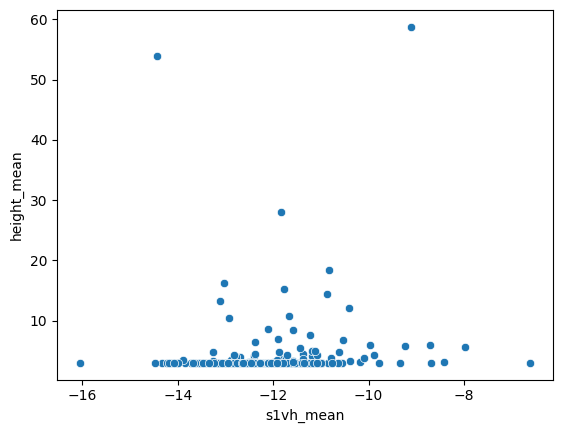

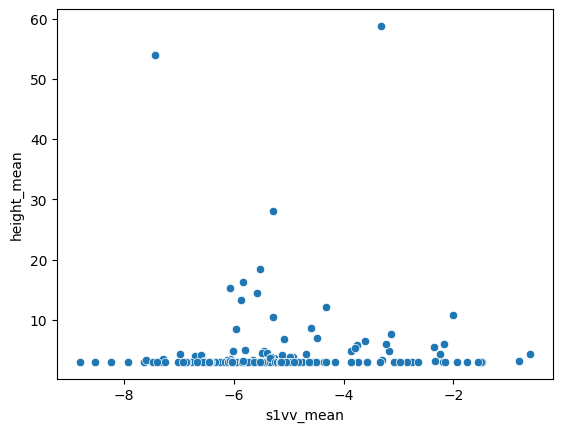

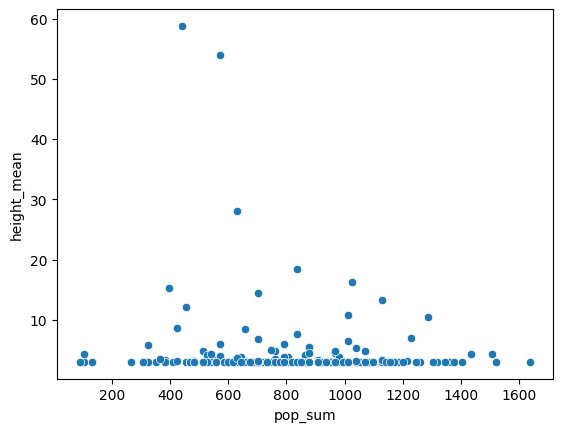

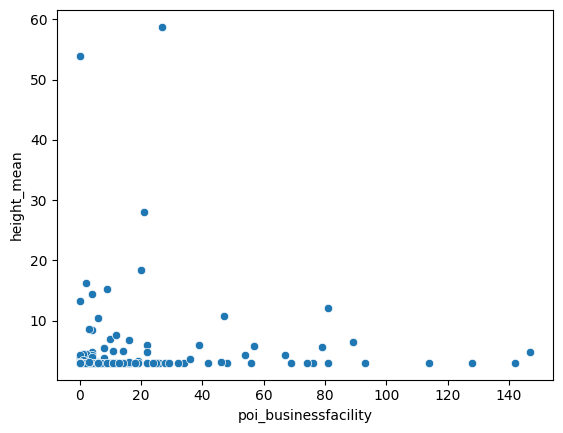

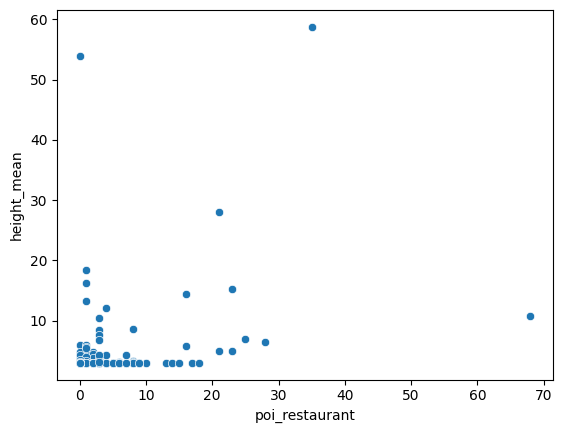

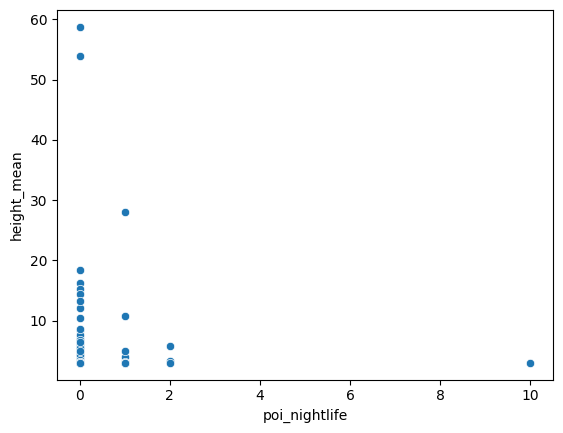

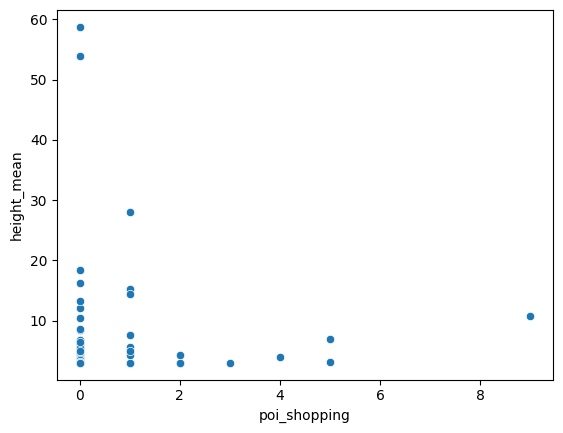

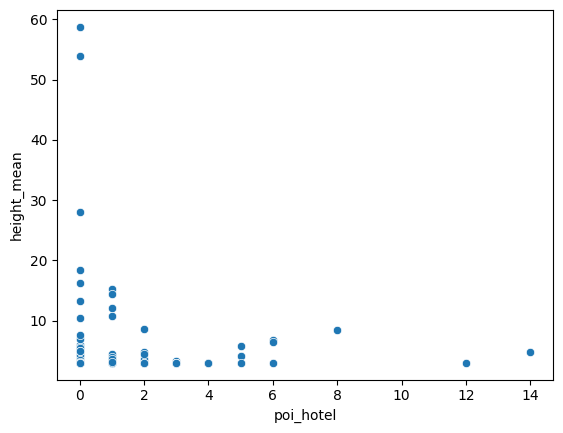

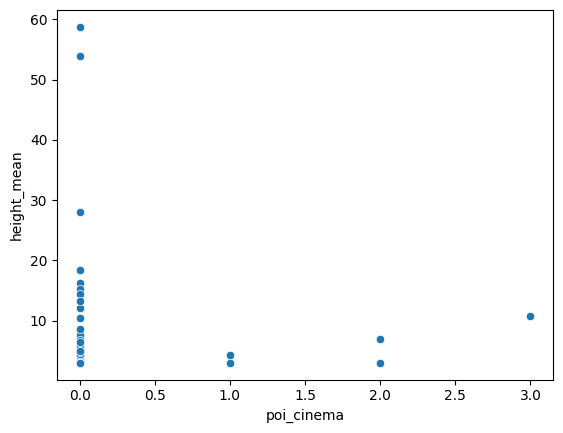

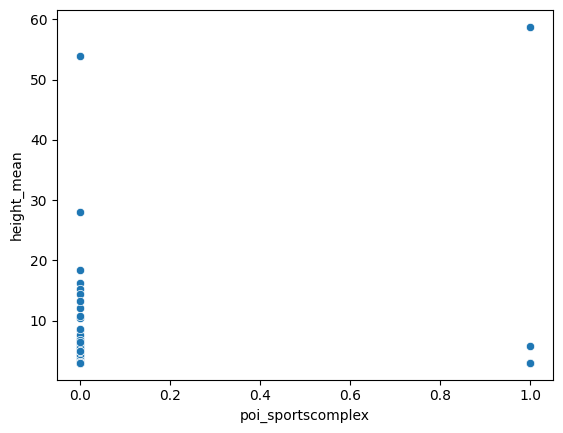

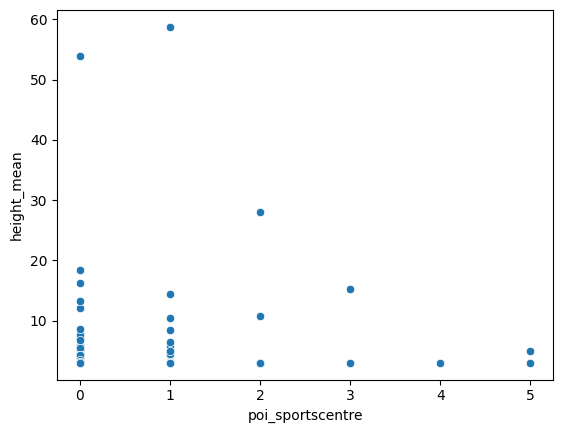

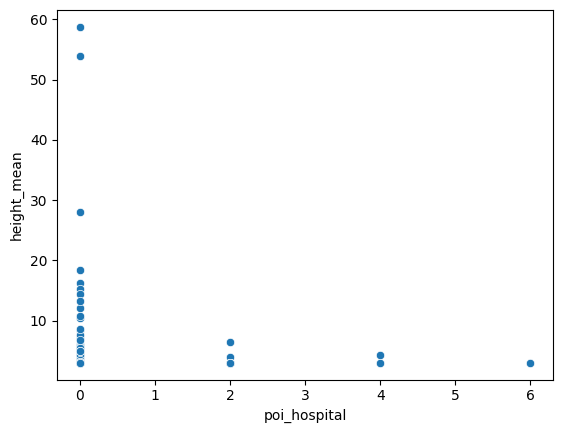

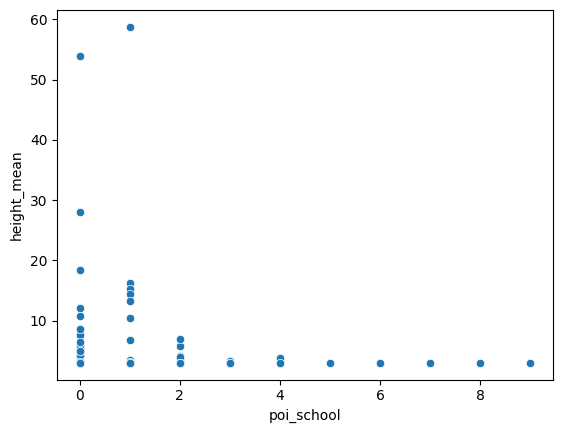

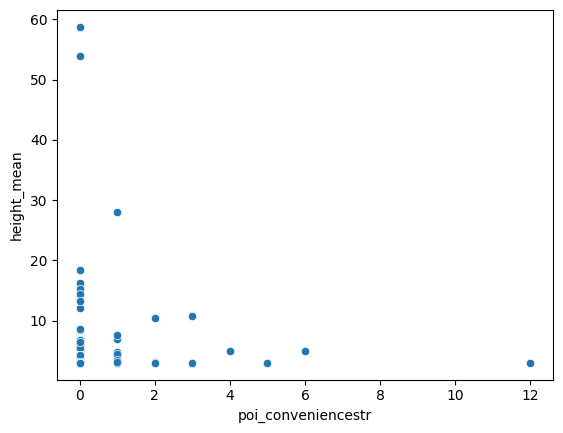

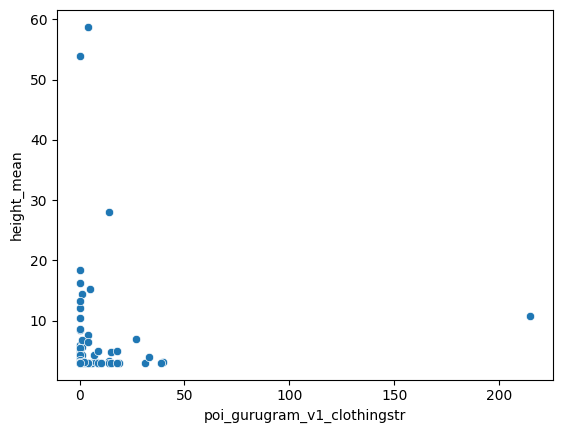

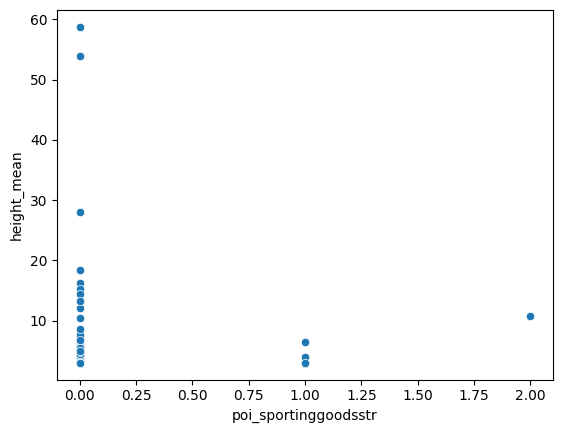

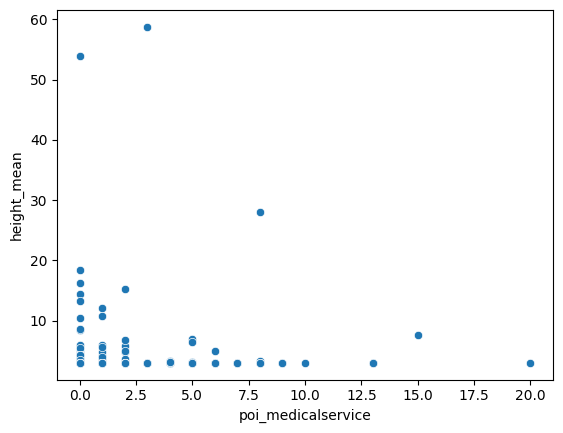

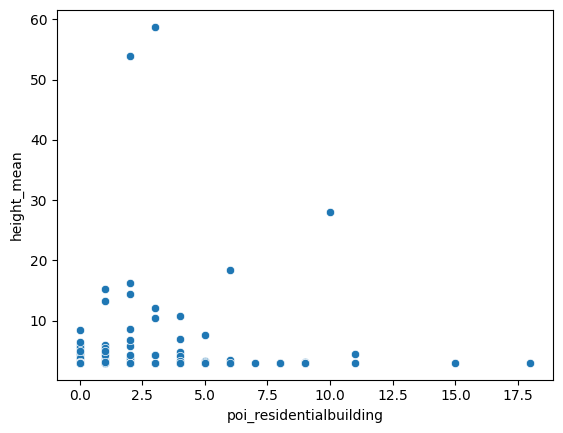

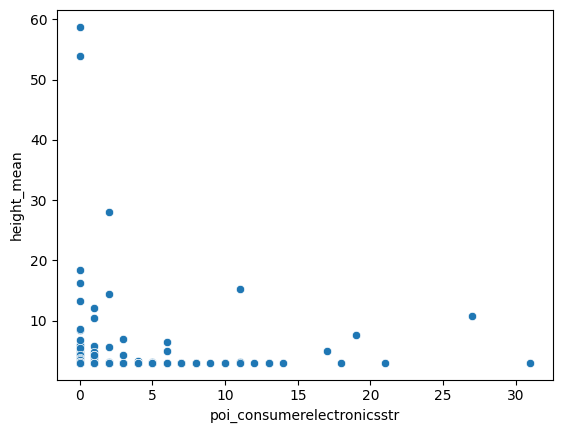

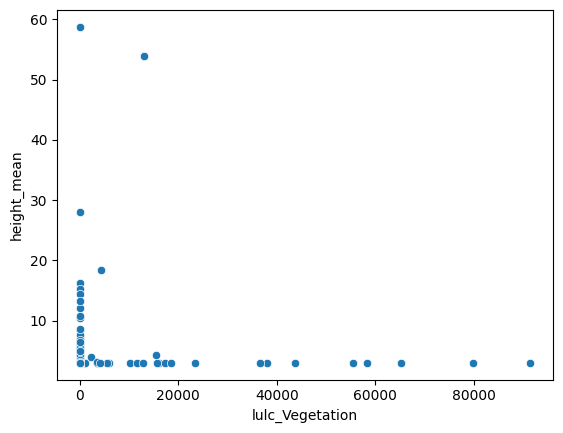

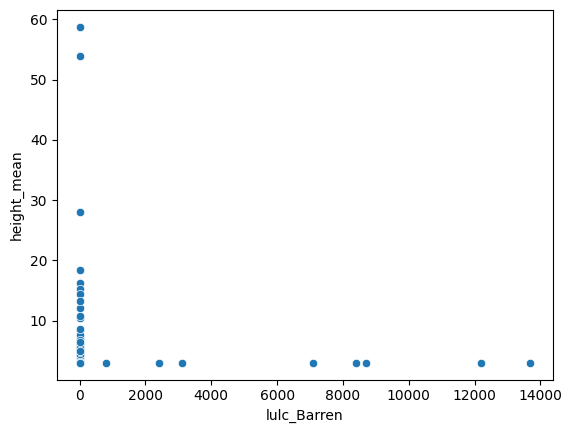

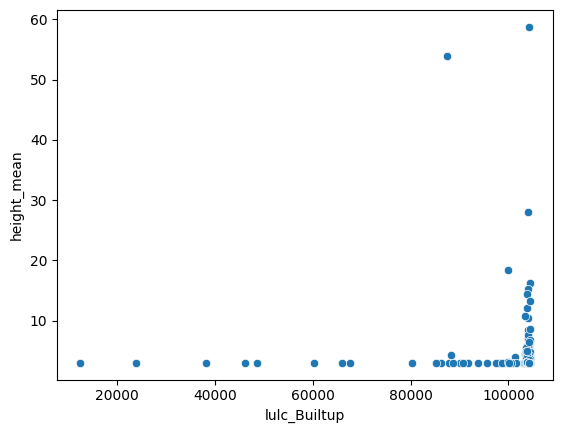

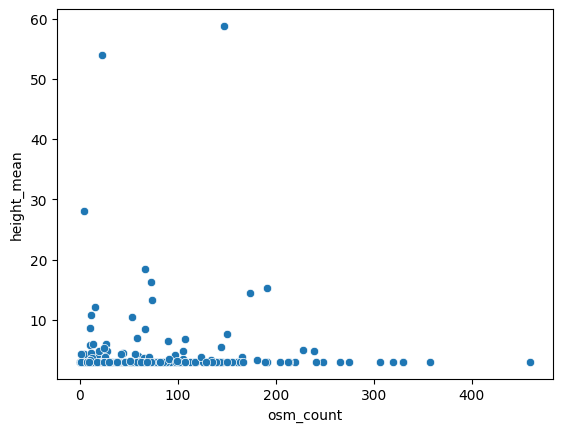

In [69]:
for i in df_test.columns[:-1]:
    plt.figure()
    sns.scatterplot(x=df_test[i],y=df_test["height_mean"])

In [70]:
df_test.isnull().sum()

ndvi_mean                      0
ndbi_mean                      0
albedo_mean                    0
gaia_mean                      0
ntl_mean                       0
s1vh_mean                      0
s1vv_mean                      0
pop_sum                        0
poi_businessfacility           0
poi_restaurant                 0
poi_nightlife                  0
poi_shopping                   0
poi_hotel                      0
poi_cinema                     0
poi_sportscomplex              0
poi_sportscentre               0
poi_hospital                   0
poi_school                     0
poi_conveniencestr             0
poi_gurugram_v1_clothingstr    0
poi_sportinggoodsstr           0
poi_medicalservice             0
poi_residentialbuilding        0
poi_consumerelectronicsstr     0
lulc_Vegetation                0
lulc_Barren                    0
lulc_Builtup                   0
osm_count                      0
height_mean                    0
dtype: int64

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X=df_test.iloc[:,:-1]
VIF=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [72]:
X=pd.DataFrame({"columns_name":df_test.columns[:-1],"VIF":VIF})
X

columns_name          VIF
0                     ndvi_mean    45.003182
1                     ndbi_mean    20.018896
2                   albedo_mean  2703.803053
3                     gaia_mean    37.400896
4                      ntl_mean    21.814849
5                     s1vh_mean   312.936520
6                     s1vv_mean    62.029159
7                       pop_sum    21.030584
8          poi_businessfacility     2.569185
9                poi_restaurant     4.379400
10                poi_nightlife     1.651936
11                 poi_shopping     3.324291
12                    poi_hotel     1.370253
13                   poi_cinema     4.122813
14            poi_sportscomplex     1.286893
15             poi_sportscentre     2.760456
16                 poi_hospital     1.281563
17                   poi_school     2.187237
18           poi_conveniencestr     2.101933
19  poi_gurugram_v1_clothingstr     6.636794
20         poi_sportinggoodsstr     2.512987
21           poi_medicalservice     3.413788
22      poi_residentialbuilding     1.912861
23   poi_consumerelectronicsstr     4.608865
24              lulc_Vegetation    41.007323
25                  lulc_Barren     2.757629
26                 lulc_Builtup  2665.993198
27                    osm_count     4.182421

In [29]:
df_test_1=df_test.drop(columns=["albedo_mean","s1vh_mean","lulc_Builtup"])

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X=df_test_1.iloc[:,:-1]
VIF=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [31]:
X=pd.DataFrame({"columns_name":df_test_1.columns[:-1],"VIF":VIF})
X

columns_name        VIF
0    ndvi_mean  15.264956
1    ndbi_mean  13.955664
2    gaia_mean  21.115697
3     ntl_mean  10.942541
4    s1vv_mean  16.969180
5      pop_sum  10.237821
6    osm_count   3.144191

<h1><center>Model Building<center></h1>

## Linear Regression

In [73]:
#x=df_test.iloc[:,:-1]
col=col=["ndvi_mean",'ntl_mean',"pop_sum","poi_businessfacility","poi_restaurant","poi_cinema","poi_sportscentre","poi_school",
    "poi_gurugram_v1_clothingstr","poi_medicalservice","poi_residentialbuilding","lulc_Vegetation"]
x=df_test[col]
y=df_test.iloc[:,-1]

In [74]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(157, 12)
(157,)
(40, 12)
(40,)


In [75]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [76]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [77]:
y_predict_train=model.predict(x_train)
y_predict_test=model.predict(x_test)

#### RESULT OF LINEAR REGRESSION 

In [79]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))
n = X.shape[0]
p = X.shape[1]
r2_train=r2_score(y_train,y_predict_train)
r2_test=r2_score(y_test,y_predict_test)                
adjusted_r2_train = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)
adjusted_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)
print("adjust_r2_train:",adjusted_r2_train)
print("adjusted_r2_test:",adjusted_r2_test)

mean Absolute error_of_train:  2.6101172382010285
mean Absolute error_of_test:  1.9633714829742375
mean squared error_of_train:  30.915518728931804
mean squared error_of_test:  8.254337856216514
root mean Absolute error_of_train:  5.560172544888495
root mean Absolute error_of_test:  2.8730363478759737
r2_on_train:  0.24694429382779715
r2_on_test:   0.5028677842692133
adjust_r2_train: 0.18669983733402096
adjusted_r2_test: 0.4630972070107504


In [38]:
#y_predict_test

### Original_height vs Predicted height 

In [39]:
com_org_vs_pre=pd.DataFrame({"original_height":y_test,"predicted_height":y_predict_test})
com_org_vs_pre.reset_index(drop=True,inplace=True)
com_org_vs_pre

original_height  predicted_height
0          3.053254          6.094613
1         28.100000          9.205991
2          3.000000          4.075756
3          3.000000          3.933508
4          3.000000          3.360969
5          3.000000          2.446233
6          3.696429          5.373770
7          3.000000          6.193027
8          8.600000          9.152327
9          3.000000          2.714262
10         3.000000          2.628361
11         3.000000          3.698368
12         3.000000          3.327671
13         8.462500          5.971037
14         3.000000          2.550365
15         3.000000          3.244606
16         3.000000          1.223355
17         3.000000          3.233185
18         3.104762          4.053280
19         5.553719          9.193096
20         6.731429          5.979259
21         3.000000          3.621571
22         3.000000          2.996848
23         3.000000          3.903387
24         3.000000          5.410254
25         3.000000          3.737562
26         3.457143          4.236387
27         3.000000          2.844420
28         3.000000          1.749416
29         3.000000          5.192889
30         3.000000          5.377334
31         3.000000          3.499483
32         3.000000          1.617811
33         3.000000          3.604805
34         3.000000          5.454267
35         3.164557          3.658488
36         3.000000          2.607063
37         3.000000          4.637898
38         3.000000          3.468012
39         3.000000          5.032519

### Comparision btw Original_height vs Predicted height 

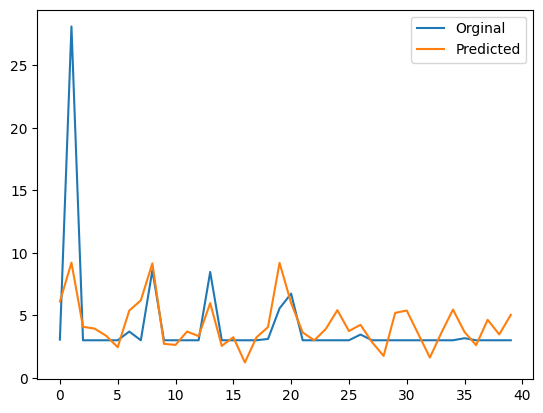

In [40]:
plt.figure
com_org_vs_pre["original_height"].plot(label="Orginal")
com_org_vs_pre["predicted_height"].plot(label="Predicted")
plt.legend()
plt.show()

# RandomForest

In [41]:
x=df_test.iloc[:,:-1]
y=df_test.iloc[:,-1]

In [42]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(157, 10)
(157,)
(40, 10)
(40,)


In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [44]:
from sklearn.ensemble import RandomForestRegressor
model_r=RandomForestRegressor(n_estimators=200,max_depth=3,random_state=42)

In [45]:
model_r.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=200, random_state=42)

In [47]:
y_predict_train=model_r.predict(x_train)
y_predict_test=model_r.predict(x_test)

#### RESULT OF Random Forest (Max depth=1,other default)

In [48]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))

mean Absolute error_of_train:  1.6189888184718335
mean Absolute error_of_test:  1.9199223770072493
mean squared error_of_train:  10.711191944951471
mean squared error_of_test:  18.199868263225603
root mean Absolute error_of_train:  3.2727957383484036
root mean Absolute error_of_test:  4.266130361724264
r2_on_train:  0.7390914160368629
r2_on_test:   -0.09611951840470456


### Features's  Importance

In [49]:
pd.DataFrame(df_test.columns)
values=model_r.feature_importances_
pd.DataFrame({"columns_name":df_test.columns[:-1],"feature_importances":values})

columns_name  feature_importances
0     ndvi_mean             0.090546
1     ndbi_mean             0.110147
2   albedo_mean             0.044791
3     gaia_mean             0.034629
4      ntl_mean             0.189565
5     s1vh_mean             0.281876
6     s1vv_mean             0.030999
7       pop_sum             0.071242
8  lulc_Builtup             0.031900
9     osm_count             0.114305

### Original_height vs Predicted height 

In [50]:
com_org_vs_pre=pd.DataFrame({"Original_height":y_test,"Predicted_height":y_predict_test})
com_org_vs_pre.reset_index(drop=True,inplace=True)
com_org_vs_pre

Original_height  Predicted_height
0          3.053254          3.446050
1         28.100000          6.414212
2          3.000000          3.496920
3          3.000000          4.381551
4          3.000000          3.348933
5          3.000000          3.654641
6          3.696429          3.452332
7          3.000000          4.238673
8          8.600000          5.926975
9          3.000000          4.177077
10         3.000000          3.441109
11         3.000000          3.673172
12         3.000000          3.346680
13         8.462500          6.828079
14         3.000000          4.808133
15         3.000000          3.540293
16         3.000000          4.041647
17         3.000000          3.417252
18         3.104762          3.607061
19         5.553719         16.887761
20         6.731429          3.764236
21         3.000000          3.480263
22         3.000000          3.730710
23         3.000000          3.830926
24         3.000000          3.494375
25         3.000000          3.626244
26         3.457143          9.571518
27         3.000000          3.521125
28         3.000000          3.538905
29         3.000000          3.465046
30         3.000000         10.245591
31         3.000000          3.358104
32         3.000000          4.042079
33         3.000000          3.618152
34         3.000000          3.814610
35         3.164557          3.350473
36         3.000000          4.441504
37         3.000000          3.664182
38         3.000000          3.622730
39         3.000000          4.002317

### Comparision btw Original_height vs Predicted height 

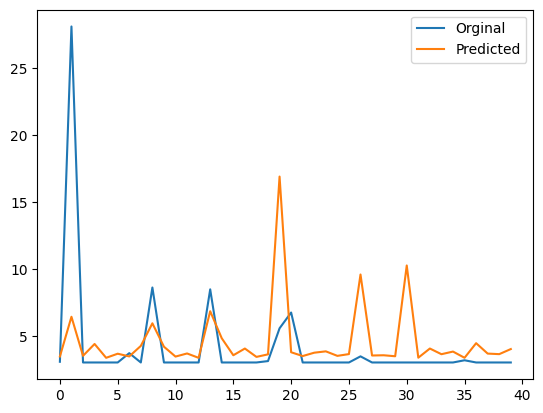

In [51]:
plt.figure
com_org_vs_pre["Original_height"].plot(label="Orginal")
com_org_vs_pre["Predicted_height"].plot(label="Predicted")
plt.legend()
plt.show()

### Find Best fit parameter for Random Forest  By RandomizedSearchCV

In [47]:

from sklearn.model_selection import RandomizedSearchCV
n_estimators= [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=10,stop=110,num=11)]
# when there is no max_depth it takes none so that the model go to its maximum extent 
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]
# Create the random grid
random_grid={'n_estimators': n_estimators , 'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap}
random_grid
rf=RandomForestRegressor(random_state=42)
# here cv is cross validation and n_jobs=-1 tell to run all trees simulteniously
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,
                             scoring='neg_mean_absolute_error',cv=3,verbose=2,
                             random_state=42,n_jobs=-1,return_train_score=True)

rf2=rf_random.fit(x_train,y_train);
# by runninng below code we get  the parameter for best model
#print("best parameter",rf2.best_params_)
#y_pred=rf2.predict(x_test)
#print("r2_on_train: ", (y_pred,y_test))
#rf2.cv_results_
#importance=rf2.feature_importances_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [48]:
print("best parameter",rf2.best_params_)

best parameter {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}


## Random Forest with after find best parameter

####  with lulc builtup

In [52]:
from sklearn.ensemble import RandomForestRegressor
model_r_b=RandomForestRegressor(n_estimators=800,min_samples_split = 5,max_depth=30,min_samples_leaf=4,max_features='sqrt',random_state=42)


In [53]:
model_r_b.fit(x_train,y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=5, n_estimators=800, random_state=42)

In [54]:
y_predict_train=model_r_b.predict(x_train)
y_predict_test=model_r_b.predict(x_test)
#y_predict_test

In [55]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))
n = X.shape[0]
p = X.shape[1]
r2_train=r2_score(y_train,y_predict_train)
r2_test=r2_score(y_test,y_predict_test)                
adjusted_r2_train = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)
adjusted_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)
print("adjust_r2_train-",adjusted_r2_train)
print("adjusted_r2_test-",adjusted_r2_test)

mean Absolute error_of_train:  1.9508090498482171
mean Absolute error_of_test:  1.7160074614791092
mean squared error_of_train:  28.3442815890638
mean squared error_of_test:  13.423725698108901
root mean Absolute error_of_train:  5.323934784448792
root mean Absolute error_of_test:  3.663840293750384
r2_on_train:  0.30957577729333097
r2_on_test:   0.19153218393679794
adjust_r2_train- -0.03563633406000344
adjusted_r2_test- -0.21270172409480304


### without lulc builtup

In [54]:
x=df_test.iloc[:,:-1]
y=df_test.iloc[:,-1]

In [55]:
x=x.drop(columns="lulc_Builtup")

In [56]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(157, 9)
(157,)
(40, 9)
(40,)


In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [58]:

from sklearn.model_selection import RandomizedSearchCV
n_estimators= [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=10,stop=110,num=11)]
# when there is no max_depth it takes none so that the model go to its maximum extent 
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]
# Create the random grid
random_grid={'n_estimators': n_estimators , 'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap}
random_grid
rf=RandomForestRegressor(random_state=42)
# here cv is cross validation and n_jobs=-1 tell to run all trees simulteniously
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,
                             scoring='neg_mean_absolute_error',cv=3,verbose=2,
                             random_state=42,n_jobs=-1,return_train_score=True)

rf2=rf_random.fit(x_train,y_train);
# by runninng below code we get  the parameter for best model
#print("best parameter",rf2.best_params_)
#y_pred=rf2.predict(x_test)
#print("r2_on_train: ", (y_pred,y_test))
#rf2.cv_results_
#importance=rf2.feature_importances_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [59]:
print("best parameter",rf2.best_params_)

best parameter {'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [60]:
from sklearn.ensemble import RandomForestRegressor
model_r_b=RandomForestRegressor(n_estimators=1200,min_samples_split = 10,min_samples_leaf=4,max_features='sqrt',random_state=42)

In [61]:
model_r_b.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=1200, random_state=42)

In [62]:
y_predict_train=model_r_b.predict(x_train)
y_predict_test=model_r_b.predict(x_test)
#y_predict_test

### Result of Random Forest(with best parameter)

In [63]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))

mean Absolute error_of_train:  1.976537059393885
mean Absolute error_of_test:  1.6030881305492026
mean squared error_of_train:  29.058212919699226
mean squared error_of_test:  12.885809893428652
root mean Absolute error_of_train:  5.390567031370561
root mean Absolute error_of_test:  3.589681029482794
r2_on_train:  0.2921854799781193
r2_on_test:   0.22392912243331298


### so after introducing lulc builtup accuracy decreases

### Features's  Importance

In [64]:
pd.DataFrame(x.columns)
values=model_r_b.feature_importances_
pd.DataFrame({"columns_name":x.columns,"feature_importances":values})

columns_name  feature_importances
0    ndvi_mean             0.071557
1    ndbi_mean             0.105156
2  albedo_mean             0.058042
3    gaia_mean             0.049971
4     ntl_mean             0.312299
5    s1vh_mean             0.205506
6    s1vv_mean             0.068177
7      pop_sum             0.068125
8    osm_count             0.061167

### Original_height vs Predicted height 

In [65]:
com_org_vs_pre=pd.DataFrame({"Original_height":y_test,"Predicted_height":y_predict_test})
com_org_vs_pre.reset_index(drop=True,inplace=True)
com_org_vs_pre

Original_height  Predicted_height
0          3.053254          3.568415
1         28.100000          7.495379
2          3.000000          3.759836
3          3.000000          4.573289
4          3.000000          3.192133
5          3.000000          3.704599
6          3.696429          3.381915
7          3.000000          4.994928
8          8.600000          7.797186
9          3.000000          4.083530
10         3.000000          3.607962
11         3.000000          3.851078
12         3.000000          3.264661
13         8.462500          6.625946
14         3.000000          4.882671
15         3.000000          3.517384
16         3.000000          4.026194
17         3.000000          3.451685
18         3.104762          3.902955
19         5.553719         11.298625
20         6.731429          4.325738
21         3.000000          3.378498
22         3.000000          3.842329
23         3.000000          3.811665
24         3.000000          3.491534
25         3.000000          3.938954
26         3.457143          5.702342
27         3.000000          3.587900
28         3.000000          3.445216
29         3.000000          3.607856
30         3.000000          6.048795
31         3.000000          3.141082
32         3.000000          3.571268
33         3.000000          3.433117
34         3.000000          4.861040
35         3.164557          3.210992
36         3.000000          5.574054
37         3.000000          3.960914
38         3.000000          3.760230
39         3.000000          4.445033

### Comparision btw Original_height vs Predicted height 

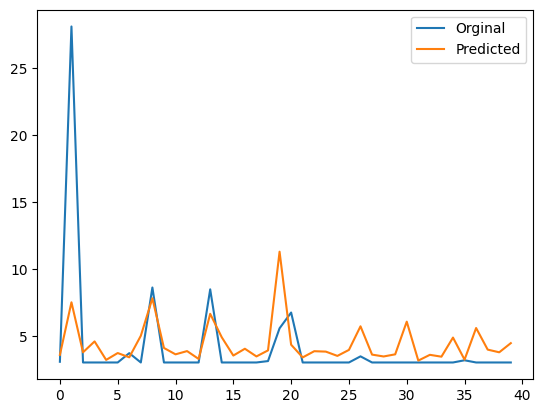

In [188]:
plt.figure
com_org_vs_pre["Original_height"].plot(label="Orginal")
com_org_vs_pre["Predicted_height"].plot(label="Predicted")
plt.legend()
plt.show()

In [189]:
from xgboost import XGBRegressor
model_x = XGBRegressor()
model_x.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [190]:
y_predict_train=model_x.predict(x_train)
y_predict_test=model_x.predict(x_test)

In [191]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))

mean Absolute error_of_train:  0.0005933914863926672
mean Absolute error_of_test:  1.2273421690475463
mean squared error_of_train:  6.954486906529035e-07
mean squared error_of_test:  16.167167242645494
root mean Absolute error_of_train:  0.0008339356633775195
root mean Absolute error_of_test:  4.020841608748782
r2_on_train:  0.9999999830599121
r2_on_test:   0.02630352507638789


In [192]:
com_org_vs_pre=pd.DataFrame({"Original_height":y_test,"Predicted_height":y_predict_test})
com_org_vs_pre.reset_index(drop=True,inplace=True)
com_org_vs_pre

Original_height  Predicted_height
0          3.053254          3.088690
1         28.100000          4.016023
2          3.000000          3.396872
3          3.000000          3.292344
4          3.000000          2.915522
5          3.000000          3.373805
6          3.696429          3.425751
7          3.000000          4.457656
8          8.600000          3.539790
9          3.000000          3.032928
10         3.000000          3.076280
11         3.000000          2.904551
12         3.000000          3.067816
13         8.462500          8.078333
14         3.000000          3.925434
15         3.000000          3.085068
16         3.000000          2.916323
17         3.000000          3.020579
18         3.104762          3.641796
19         5.553719          9.891336
20         6.731429          3.453264
21         3.000000          3.138935
22         3.000000          3.059443
23         3.000000          3.076278
24         3.000000          3.269334
25         3.000000          4.060296
26         3.457143          3.435240
27         3.000000          3.999462
28         3.000000          3.595743
29         3.000000          3.175547
30         3.000000          2.983667
31         3.000000          2.891618
32         3.000000          2.933254
33         3.000000          3.124158
34         3.000000          5.008529
35         3.164557          3.159674
36         3.000000          3.070656
37         3.000000          2.953308
38         3.000000          3.443298
39         3.000000          3.827401

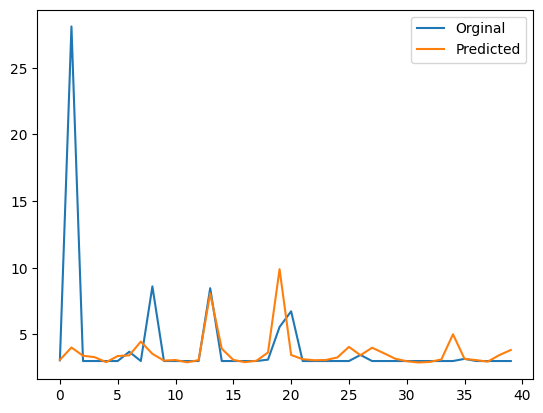

In [193]:
plt.figure
com_org_vs_pre["Original_height"].plot(label="Orginal")
com_org_vs_pre["Predicted_height"].plot(label="Predicted")
plt.legend()
plt.show()

In [196]:
from xgboost import XGBRegressor
model_xp = XGBRegressor(n_estimators=1500,max_depth=20, eta=0.3, subsample=0.7, colsample_bytree=0.5)
model_xp.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [197]:
y_predict_train=model_xp.predict(x_train)
y_predict_test=model_xp.predict(x_test)

In [198]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))

mean Absolute error_of_train:  0.000296928737761901
mean Absolute error_of_test:  1.6928932135437011
mean squared error_of_train:  1.417268534631282e-07
mean squared error_of_test:  15.964061225239856
root mean Absolute error_of_train:  0.00037646627134861393
root mean Absolute error_of_test:  3.9955051276703246
r2_on_train:  0.9999999965477463
r2_on_test:   0.03853594713372788
